# Fandango & Chill: Investigating Biased Movie Ratings

# Introduction

The purpose of this project is to test the reliability of Fandango's rating system. Fandango is an online movie ratings aggregator, which displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. In October 2015, a data journalist named Walt Hickey found some significant discrepancies between the number of stars displayed to the users and the actual rating. After Hickey published his article, Fandango's officials replied apologising and explained that the biased rounding off was caused by a bug in their system. They have presumably fixed the error, but we cannot tell for sure since the actual rating values are not displayed anymore in the pages' HTML.

We will now check if there has been any change after Hickey's analysis. To do this, we will use two sources of the data: the first one is the data Hickey collected to carry out his analysis. The second source is a dataset of Fandango's movie ratings which have been collected after Hickey's published his article. 

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. Although we believe this is caused by Fandango's officials fixing the biased rating system following Hickey's analysis, we have no tangible proof of this hypothesis since the rating values are not displayed anymore in Fandango's pages' HTML.

# Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [2]:
# Copying and pasting the data before the article
df_dict = """{'IMDB_user_vote_count': {0: 271107, 1: 65709, 2: 103660, 3: 3136, 4: 19560, 5: 39373, 6: 2680, 7: 16876, 8: 12227, 9: 5367, 10: 12129, 11: 16547, 12: 22521, 13: 77518, 14: 334164, 15: 104235, 16: 49102, 17: 23561, 18: 50291, 19: 19521, 20: 13769, 21: 25134, 22: 22104, 23: 50438, 24: 27380, 25: 45344, 26: 154499, 27: 57123, 28: 50285, 29: 1320, 30: 2275, 31: 4160, 32: 1196, 33: 19658, 34: 12255, 35: 21319, 36: 2174, 37: 8301, 38: 2196, 39: 22440, 40: 1151, 41: 6246, 42: 20659, 43: 1107, 44: 272204, 45: 42937, 46: 89618, 47: 19222, 48: 39838, 49: 85585, 50: 56333, 51: 21914, 52: 45510, 53: 17061, 54: 33594, 55: 4857, 56: 40057, 57: 1769, 58: 41177, 59: 31878, 60: 14346, 61: 3017, 62: 16069, 63: 19220, 64: 9856, 65: 303505, 66: 10891, 67: 22348, 68: 883, 69: 13296, 70: 243, 71: 732, 72: 251856, 73: 207211, 74: 289464, 75: 45723, 76: 15982, 77: 8179, 78: 125088, 79: 21372, 80: 14156, 81: 39152, 82: 27328, 83: 5626, 84: 3200, 85: 5927, 86: 5269, 87: 18986, 88: 292023, 89: 66636, 90: 26046, 91: 38593, 92: 4911, 93: 39561, 94: 867, 95: 6605, 96: 14067, 97: 179506, 98: 50022, 99: 101264, 100: 105412, 101: 5511, 102: 12940, 103: 3658, 104: 16663, 105: 4260, 106: 19627, 107: 952, 108: 4778, 109: 17237, 110: 7819, 111: 81679, 112: 64656, 113: 44711, 114: 32166, 115: 17647, 116: 11392, 117: 5495, 118: 1062, 119: 3687, 120: 1488, 121: 950, 122: 696, 123: 11937, 124: 41158, 125: 37292, 126: 17957, 127: 4110, 128: 82579, 129: 5630, 130: 241807, 131: 55895, 132: 5444, 133: 15004, 134: 25214, 135: 17691, 136: 14873, 137: 11206, 138: 47377, 139: 12165, 140: 96252, 141: 7367, 142: 24116, 143: 24345, 144: 1955, 145: 5289}, 'Fandango_Difference': {0: 0.5, 1: 0.5, 2: 0.5, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.5, 8: 0.5, 9: 0.5, 10: 0.5, 11: 0.5, 12: 0.5, 13: 0.4, 14: 0.4, 15: 0.4, 16: 0.4, 17: 0.4, 18: 0.4, 19: 0.4, 20: 0.4, 21: 0.4, 22: 0.4, 23: 0.4, 24: 0.4, 25: 0.4, 26: 0.4, 27: 0.4, 28: 0.4, 29: 0.4, 30: 0.4, 31: 0.4, 32: 0.4, 33: 0.4, 34: 0.4, 35: 0.4, 36: 0.4, 37: 0.4, 38: 0.4, 39: 0.4, 40: 0.4, 41: 0.4, 42: 0.4, 43: 0.4, 44: 0.3, 45: 0.3, 46: 0.3, 47: 0.3, 48: 0.3, 49: 0.3, 50: 0.3, 51: 0.3, 52: 0.3, 53: 0.3, 54: 0.3, 55: 0.3, 56: 0.3, 57: 0.3, 58: 0.3, 59: 0.3, 60: 0.3, 61: 0.3, 62: 0.3, 63: 0.3, 64: 0.3, 65: 0.3, 66: 0.3, 67: 0.3, 68: 0.3, 69: 0.3, 70: 0.3, 71: 0.3, 72: 0.2, 73: 0.2, 74: 0.2, 75: 0.2, 76: 0.2, 77: 0.2, 78: 0.2, 79: 0.2, 80: 0.2, 81: 0.2, 82: 0.2, 83: 0.2, 84: 0.2, 85: 0.2, 86: 0.2, 87: 0.2, 88: 0.2, 89: 0.2, 90: 0.2, 91: 0.2, 92: 0.2, 93: 0.2, 94: 0.2, 95: 0.2, 96: 0.2, 97: 0.1, 98: 0.1, 99: 0.1, 100: 0.1, 101: 0.1, 102: 0.1, 103: 0.1, 104: 0.1, 105: 0.1, 106: 0.1, 107: 0.1, 108: 0.1, 109: 0.1, 110: 0.1, 111: 0.1, 112: 0.1, 113: 0.1, 114: 0.1, 115: 0.1, 116: 0.1, 117: 0.1, 118: 0.1, 119: 0.1, 120: 0.1, 121: 0.1, 122: 0.1, 123: 0.1, 124: 0.1, 125: 0.1, 126: 0.1, 127: 0.1, 128: 0.1, 129: 0.1, 130: 0.0, 131: 0.0, 132: 0.0, 133: 0.0, 134: 0.0, 135: 0.0, 136: 0.0, 137: 0.0, 138: 0.0, 139: 0.0, 140: 0.0, 141: 0.0, 142: 0.0, 143: 0.0, 144: 0.0, 145: 0.0}, 'Metacritic_norm': {0: 3.3, 1: 3.35, 2: 3.2, 3: 1.1, 4: 1.45, 5: 2.5, 6: 2.65, 7: 4.05, 8: 4.05, 9: 4.0, 10: 3.55, 11: 3.1, 12: 4.6, 13: 2.95, 14: 3.65, 15: 1.3, 16: 2.4, 17: 2.85, 18: 2.35, 19: 1.35, 20: 3.0, 21: 2.6, 22: 2.75, 23: 2.95, 24: 3.75, 25: 4.45, 26: 3.9, 27: 3.6, 28: 3.85, 29: 4.2, 30: 4.1, 31: 3.55, 32: 3.85, 33: 1.5, 34: 2.0, 35: 1.2, 36: 2.75, 37: 3.35, 38: 2.6, 39: 3.35, 40: 3.75, 41: 4.55, 42: 4.35, 43: 4.35, 44: 2.9, 45: 3.0, 46: 2.1, 47: 1.65, 48: 1.35, 49: 1.9, 50: 3.15, 51: 1.9, 52: 2.55, 53: 1.55, 54: 2.8, 55: 2.25, 56: 2.35, 57: 2.7, 58: 1.5, 59: 1.35, 60: 1.6, 61: 2.5, 62: 2.5, 63: 2.05, 64: 1.95, 65: 4.4, 66: 3.85, 67: 2.95, 68: 3.6, 69: 4.7, 70: 4.15, 71: 3.35, 72: 3.6, 73: 3.35, 74: 2.95, 75: 2.15, 76: 3.6, 77: 1.7, 78: 2.05, 79: 2.35, 80: 2.8, 81: 3.1, 82: 2.55, 83: 1.7, 84: 1.55, 85: 1.5, 86: 3.7, 87: 2.6, 88: 4.45, 89: 3.75, 90: 3.1, 91: 3.85, 92: 3.6, 93: 3.75, 94: 3.25, 95: 4.15, 96: 4.3, 97: 2.3, 98: 1.7, 99: 2.8, 100: 2.0, 101: 1.5, 102: 2.55, 103: 1.25, 104: 1.95, 105: 1.4, 106: 2.45, 107: 1.85, 108: 2.55, 109: 2.9, 110: 2.8, 111: 3.45, 112: 4.15, 113: 4.05, 114: 3.95, 115: 3.8, 116: 3.9, 117: 3.85, 118: 3.2, 119: 4.55, 120: 3.75, 121: 3.4, 122: 4.3, 123: 3.0, 124: 2.75, 125: 1.75, 126: 2.55, 127: 3.0, 128: 3.75, 129: 4.25, 130: 2.95, 131: 2.8, 132: 2.35, 133: 0.65, 134: 1.65, 135: 1.55, 136: 2.1, 137: 2.9, 138: 2.5, 139: 1.8, 140: 4.7, 141: 3.35, 142: 4.15, 143: 4.45, 144: 4.5, 145: 3.4}, 'IMDB': {0: 7.8, 1: 7.1, 2: 7.8, 3: 5.4, 4: 5.1, 5: 7.2, 6: 6.9, 7: 6.5, 8: 7.4, 9: 7.8, 10: 7.2, 11: 6.4, 12: 7.7, 13: 7.2, 14: 8.1, 15: 6.1, 16: 6.6, 17: 7.8, 18: 6.3, 19: 5.6, 20: 7.5, 21: 6.3, 22: 7.6, 23: 6.6, 24: 6.7, 25: 7.5, 26: 7.7, 27: 7.5, 28: 8.2, 29: 7.9, 30: 7.7, 31: 7.8, 32: 7.5, 33: 4.6, 34: 5.5, 35: 6.3, 36: 6.1, 37: 5.9, 38: 6.3, 39: 6.3, 40: 6.9, 41: 7.2, 42: 8.2, 43: 7.0, 44: 7.8, 45: 6.6, 46: 6.4, 47: 5.2, 48: 4.0, 49: 6.9, 50: 6.7, 51: 7.1, 52: 7.3, 53: 4.9, 54: 6.6, 55: 6.6, 56: 6.4, 57: 6.2, 58: 5.5, 59: 5.5, 60: 5.4, 61: 6.5, 62: 6.3, 63: 6.4, 64: 6.3, 65: 7.9, 66: 7.6, 67: 5.9, 68: 7.3, 69: 6.9, 70: 7.7, 71: 7.8, 72: 7.4, 73: 7.4, 74: 7.5, 75: 6.5, 76: 8.4, 77: 6.3, 78: 7.0, 79: 5.0, 80: 6.9, 81: 7.0, 82: 5.4, 83: 6.6, 84: 5.5, 85: 7.4, 86: 8.2, 87: 5.6, 88: 8.3, 89: 7.3, 90: 6.1, 91: 7.2, 92: 7.5, 93: 7.6, 94: 6.9, 95: 8.4, 96: 8.2, 97: 4.2, 98: 6.1, 99: 6.6, 100: 5.5, 101: 4.4, 102: 6.6, 103: 5.7, 104: 5.8, 105: 5.9, 106: 6.5, 107: 4.6, 108: 6.4, 109: 7.1, 110: 6.6, 111: 6.0, 112: 6.9, 113: 6.7, 114: 7.1, 115: 6.4, 116: 6.8, 117: 7.3, 118: 7.2, 119: 7.2, 120: 7.1, 121: 7.1, 122: 7.4, 123: 6.3, 124: 6.7, 125: 6.7, 126: 7.4, 127: 6.0, 128: 7.8, 129: 8.0, 130: 7.3, 131: 6.7, 132: 7.0, 133: 4.3, 134: 7.2, 135: 5.2, 136: 4.9, 137: 7.1, 138: 7.2, 139: 5.4, 140: 8.6, 141: 7.4, 142: 7.2, 143: 7.4, 144: 7.8, 145: 6.7}, 'RT_norm': {0: 3.7, 1: 4.25, 2: 4.0, 3: 0.9, 4: 0.7, 5: 3.15, 6: 2.1, 7: 4.3, 8: 4.95, 9: 4.45, 10: 4.2, 11: 4.1, 12: 4.95, 13: 2.55, 14: 4.5, 15: 0.45, 16: 2.3, 17: 2.95, 18: 2.5, 19: 0.85, 20: 3.95, 21: 2.95, 22: 3.4, 23: 3.0, 24: 4.25, 25: 4.95, 26: 4.6, 27: 4.4, 28: 4.8, 29: 4.6, 30: 4.8, 31: 4.45, 32: 4.6, 33: 0.5, 34: 0.95, 35: 0.55, 36: 2.6, 37: 3.55, 38: 2.55, 39: 3.0, 40: 4.7, 41: 4.95, 42: 4.85, 43: 4.75, 44: 3.75, 45: 2.5, 46: 1.5, 47: 1.35, 48: 0.45, 49: 1.3, 50: 3.35, 51: 1.6, 52: 2.7, 53: 0.4, 54: 3.55, 55: 1.95, 56: 1.7, 57: 3.2, 58: 0.6, 59: 0.6, 60: 0.55, 61: 2.3, 62: 2.25, 63: 1.3, 64: 1.3, 65: 4.6, 66: 4.65, 67: 3.0, 68: 4.7, 69: 4.9, 70: 5.0, 71: 4.65, 72: 3.6, 73: 4.05, 74: 3.05, 75: 2.5, 76: 4.5, 77: 1.35, 78: 1.5, 79: 1.55, 80: 2.75, 81: 3.6, 82: 1.7, 83: 1.0, 84: 0.65, 85: 1.0, 86: 4.05, 87: 2.7, 88: 4.85, 89: 4.65, 90: 3.9, 91: 4.9, 92: 4.35, 93: 4.8, 94: 4.1, 95: 4.8, 96: 4.95, 97: 1.25, 98: 1.45, 99: 2.85, 100: 1.3, 101: 0.8, 102: 3.1, 103: 0.85, 104: 0.85, 105: 0.35, 106: 2.45, 107: 0.65, 108: 2.0, 109: 3.35, 110: 2.6, 111: 3.55, 112: 4.8, 113: 3.65, 114: 4.5, 115: 4.15, 116: 4.45, 117: 4.05, 118: 4.0, 119: 4.95, 120: 4.2, 121: 4.2, 122: 4.75, 123: 3.1, 124: 2.25, 125: 1.35, 126: 2.6, 127: 3.0, 128: 4.6, 129: 4.85, 130: 3.55, 131: 2.7, 132: 1.75, 133: 0.25, 134: 1.55, 135: 0.7, 136: 1.1, 137: 3.85, 138: 2.6, 139: 0.9, 140: 4.9, 141: 4.35, 142: 4.85, 143: 4.85, 144: 5.0, 145: 4.35}, 'Fandango_Stars': {0: 5.0, 1: 5.0, 2: 5.0, 3: 5.0, 4: 3.5, 5: 4.5, 6: 4.0, 7: 4.0, 8: 4.5, 9: 4.5, 10: 4.5, 11: 4.0, 12: 4.0, 13: 4.5, 14: 5.0, 15: 4.5, 16: 4.5, 17: 5.0, 18: 4.5, 19: 4.5, 20: 5.0, 21: 4.5, 22: 4.5, 23: 4.5, 24: 4.5, 25: 5.0, 26: 4.5, 27: 4.5, 28: 4.5, 29: 4.5, 30: 4.5, 31: 4.5, 32: 4.5, 33: 4.0, 34: 3.5, 35: 4.0, 36: 4.0, 37: 4.0, 38: 3.5, 39: 3.5, 40: 4.0, 41: 4.0, 42: 4.0, 43: 4.0, 44: 4.5, 45: 4.0, 46: 4.5, 47: 4.5, 48: 3.0, 49: 4.5, 50: 4.5, 51: 4.5, 52: 4.5, 53: 4.0, 54: 4.5, 55: 4.5, 56: 4.0, 57: 4.0, 58: 3.5, 59: 3.5, 60: 3.5, 61: 4.0, 62: 3.5, 63: 4.0, 64: 4.0, 65: 4.0, 66: 4.0, 67: 3.0, 68: 4.5, 69: 3.5, 70: 4.5, 71: 4.5, 72: 5.0, 73: 5.0, 74: 4.5, 75: 4.5, 76: 5.0, 77: 4.0, 78: 4.0, 79: 3.0, 80: 4.0, 81: 4.0, 82: 3.0, 83: 4.0, 84: 3.5, 85: 4.5, 86: 4.5, 87: 3.5, 88: 4.5, 89: 4.5, 90: 3.5, 91: 4.5, 92: 4.5, 93: 4.5, 94: 3.5, 95: 4.5, 96: 4.5, 97: 4.0, 98: 4.0, 99: 4.0, 100: 3.5, 101: 3.0, 102: 4.0, 103: 3.5, 104: 3.5, 105: 4.0, 106: 3.5, 107: 3.0, 108: 4.0, 109: 4.0, 110: 4.0, 111: 3.5, 112: 3.0, 113: 3.0, 114: 3.5, 115: 3.0, 116: 3.5, 117: 4.0, 118: 4.0, 119: 3.5, 120: 3.5, 121: 4.0, 122: 4.0, 123: 4.5, 124: 4.5, 125: 4.5, 126: 4.5, 127: 4.5, 128: 4.5, 129: 4.5, 130: 4.5, 131: 4.0, 132: 4.5, 133: 3.5, 134: 4.5, 135: 3.0, 136: 3.0, 137: 4.0, 138: 4.5, 139: 3.0, 140: 4.5, 141: 4.0, 142: 3.5, 143: 3.5, 144: 3.5, 145: 3.5}, 'FILM': {0: 'Avengers: Age of Ultron (2015)', 1: 'Cinderella (2015)', 2: 'Ant-Man (2015)', 3: 'Do You Believe? (2015)', 4: 'Hot Tub Time Machine 2 (2015)', 5: 'The Water Diviner (2015)', 6: 'Irrational Man (2015)', 7: 'Top Five (2014)', 8: 'Shaun the Sheep Movie (2015)', 9: 'Love & Mercy (2015)', 10: 'Far From The Madding Crowd (2015)', 11: 'Black Sea (2015)', 12: 'Leviathan (2014)', 13: 'Unbroken (2014)', 14: 'The Imitation Game (2014)', 15: 'Taken 3 (2015)', 16: 'Ted 2 (2015)', 17: 'Southpaw (2015)', 18: 'Night at the Museum: Secret of the Tomb (2014)', 19: 'Pixels (2015)', 20: 'McFarland, USA (2015)', 21: 'Insidious: Chapter 3 (2015)', 22: 'The Man From U.N.C.L.E. (2015)', 23: 'Run All Night (2015)', 24: 'Trainwreck (2015)', 25: 'Selma (2014)', 26: 'Ex Machina (2015)', 27: 'Still Alice (2015)', 28: 'Wild Tales (2014)', 29: 'The End of the Tour (2015)', 30: 'Red Army (2015)', 31: 'When Marnie Was There (2015)', 32: 'The Hunting Ground (2015)', 33: 'The Boy Next Door (2015)', 34: 'Aloha (2015)', 35: 'The Loft (2015)', 36: '5 Flights Up (2015)', 37: 'Welcome to Me (2015)', 38: 'Saint Laurent (2015)', 39: 'Maps to the Stars (2015)', 40: "I'll See You In My Dreams (2015)", 41: 'Timbuktu (2015)', 42: 'About Elly (2015)', 43: 'The Diary of a Teenage Girl (2015)', 44: 'Kingsman: The Secret Service (2015)', 45: 'Tomorrowland (2015)', 46: 'The Divergent Series: Insurgent (2015)', 47: 'Annie (2014)', 48: 'Fantastic Four (2015)', 49: 'Terminator Genisys (2015)', 50: 'Pitch Perfect 2 (2015)', 51: 'Entourage (2015)', 52: 'The Age of Adaline (2015)', 53: 'Hot Pursuit (2015)', 54: 'The DUFF (2015)', 55: 'Black or White (2015)', 56: 'Project Almanac (2015)', 57: 'Ricki and the Flash (2015)', 58: 'Seventh Son (2015)', 59: 'Mortdecai (2015)', 60: 'Unfinished Business (2015)', 61: 'American Ultra (2015)', 62: 'True Story (2015)', 63: 'Child 44 (2015)', 64: 'Dark Places (2015)', 65: 'Birdman (2014)', 66: 'The Gift (2015)', 67: 'Unfriended (2015)', 68: 'Monkey Kingdom (2015)', 69: 'Mr. Turner (2014)', 70: 'Seymour: An Introduction (2015)', 71: 'The Wrecking Crew (2015)', 72: 'American Sniper (2015)', 73: 'Furious 7 (2015)', 74: 'The Hobbit: The Battle of the Five Armies (2014)', 75: 'San Andreas (2015)', 76: 'Straight Outta Compton (2015)', 77: 'Vacation (2015)', 78: 'Chappie (2015)', 79: 'Poltergeist (2015)', 80: 'Paper Towns (2015)', 81: 'Big Eyes (2014)', 82: 'Blackhat (2015)', 83: 'Self/less (2015)', 84: 'Sinister 2 (2015)', 85: 'Little Boy (2015)', 86: 'Me and Earl and The Dying Girl (2015)', 87: 'Maggie (2015)', 88: 'Mad Max: Fury Road (2015)', 89: 'Spy (2015)', 90: 'The SpongeBob Movie: Sponge Out of Water (2015)', 91: 'Paddington (2015)', 92: 'Dope (2015)', 93: 'What We Do in the Shadows (2015)', 94: 'The Overnight (2015)', 95: 'The Salt of the Earth (2015)', 96: 'Song of the Sea (2014)', 97: 'Fifty Shades of Grey (2015)', 98: 'Get Hard (2015)', 99: 'Focus (2015)', 100: 'Jupiter Ascending (2015)', 101: 'The Gallows (2015)', 102: 'The Second Best Exotic Marigold Hotel (2015)', 103: 'Strange Magic (2015)', 104: 'The Gunman (2015)', 105: 'Hitman: Agent 47 (2015)', 106: 'Cake (2015)', 107: 'The Vatican Tapes (2015)', 108: 'A Little Chaos (2015)', 109: 'The 100-Year-Old Man Who Climbed Out the Window and Disappeared (2015)', 110: 'Escobar: Paradise Lost (2015)', 111: 'Into the Woods (2014)', 112: 'It Follows (2015)', 113: 'Inherent Vice (2014)', 114: 'A Most Violent Year (2014)', 115: "While We're Young (2015)", 116: 'Clouds of Sils Maria (2015)', 117: 'Testament of Youth (2015)', 118: 'Infinitely Polar Bear (2015)', 119: 'Phoenix (2015)', 120: 'The Wolfpack (2015)', 121: 'The Stanford Prison Experiment (2015)', 122: 'Tangerine (2015)', 123: 'Magic Mike XXL (2015)', 124: 'Home (2015)', 125: 'The Wedding Ringer (2015)', 126: 'Woman in Gold (2015)', 127: 'The Last Five Years (2015)', 128: 'Mission: Impossible â€“ Rogue Nation (2015)', 129: 'Amy (2015)', 130: 'Jurassic World (2015)', 131: 'Minions (2015)', 132: 'Max (2015)', 133: 'Paul Blart: Mall Cop 2 (2015)', 134: 'The Longest Ride (2015)', 135: 'The Lazarus Effect (2015)', 136: 'The Woman In Black 2 Angel of Death (2015)', 137: 'Danny Collins (2015)', 138: 'Spare Parts (2015)', 139: 'Serena (2015)', 140: 'Inside Out (2015)', 141: 'Mr. Holmes (2015)', 142: "'71 (2015)", 143: 'Two Days, One Night (2014)', 144: 'Gett: The Trial of Viviane Amsalem (2015)', 145: 'Kumiko, The Treasure Hunter (2015)'}, 'RottenTomatoes': {0: 74, 1: 85, 2: 80, 3: 18, 4: 14, 5: 63, 6: 42, 7: 86, 8: 99, 9: 89, 10: 84, 11: 82, 12: 99, 13: 51, 14: 90, 15: 9, 16: 46, 17: 59, 18: 50, 19: 17, 20: 79, 21: 59, 22: 68, 23: 60, 24: 85, 25: 99, 26: 92, 27: 88, 28: 96, 29: 92, 30: 96, 31: 89, 32: 92, 33: 10, 34: 19, 35: 11, 36: 52, 37: 71, 38: 51, 39: 60, 40: 94, 41: 99, 42: 97, 43: 95, 44: 75, 45: 50, 46: 30, 47: 27, 48: 9, 49: 26, 50: 67, 51: 32, 52: 54, 53: 8, 54: 71, 55: 39, 56: 34, 57: 64, 58: 12, 59: 12, 60: 11, 61: 46, 62: 45, 63: 26, 64: 26, 65: 92, 66: 93, 67: 60, 68: 94, 69: 98, 70: 100, 71: 93, 72: 72, 73: 81, 74: 61, 75: 50, 76: 90, 77: 27, 78: 30, 79: 31, 80: 55, 81: 72, 82: 34, 83: 20, 84: 13, 85: 20, 86: 81, 87: 54, 88: 97, 89: 93, 90: 78, 91: 98, 92: 87, 93: 96, 94: 82, 95: 96, 96: 99, 97: 25, 98: 29, 99: 57, 100: 26, 101: 16, 102: 62, 103: 17, 104: 17, 105: 7, 106: 49, 107: 13, 108: 40, 109: 67, 110: 52, 111: 71, 112: 96, 113: 73, 114: 90, 115: 83, 116: 89, 117: 81, 118: 80, 119: 99, 120: 84, 121: 84, 122: 95, 123: 62, 124: 45, 125: 27, 126: 52, 127: 60, 128: 92, 129: 97, 130: 71, 131: 54, 132: 35, 133: 5, 134: 31, 135: 14, 136: 22, 137: 77, 138: 52, 139: 18, 140: 98, 141: 87, 142: 97, 143: 97, 144: 100, 145: 87}, 'RT_norm_round': {0: 3.5, 1: 4.5, 2: 4.0, 3: 1.0, 4: 0.5, 5: 3.0, 6: 2.0, 7: 4.5, 8: 5.0, 9: 4.5, 10: 4.0, 11: 4.0, 12: 5.0, 13: 2.5, 14: 4.5, 15: 0.5, 16: 2.5, 17: 3.0, 18: 2.5, 19: 1.0, 20: 4.0, 21: 3.0, 22: 3.5, 23: 3.0, 24: 4.5, 25: 5.0, 26: 4.5, 27: 4.5, 28: 5.0, 29: 4.5, 30: 5.0, 31: 4.5, 32: 4.5, 33: 0.5, 34: 1.0, 35: 0.5, 36: 2.5, 37: 3.5, 38: 2.5, 39: 3.0, 40: 4.5, 41: 5.0, 42: 5.0, 43: 5.0, 44: 4.0, 45: 2.5, 46: 1.5, 47: 1.5, 48: 0.5, 49: 1.5, 50: 3.5, 51: 1.5, 52: 2.5, 53: 0.5, 54: 3.5, 55: 2.0, 56: 1.5, 57: 3.0, 58: 0.5, 59: 0.5, 60: 0.5, 61: 2.5, 62: 2.5, 63: 1.5, 64: 1.5, 65: 4.5, 66: 4.5, 67: 3.0, 68: 4.5, 69: 5.0, 70: 5.0, 71: 4.5, 72: 3.5, 73: 4.0, 74: 3.0, 75: 2.5, 76: 4.5, 77: 1.5, 78: 1.5, 79: 1.5, 80: 3.0, 81: 3.5, 82: 1.5, 83: 1.0, 84: 0.5, 85: 1.0, 86: 4.0, 87: 2.5, 88: 5.0, 89: 4.5, 90: 4.0, 91: 5.0, 92: 4.5, 93: 5.0, 94: 4.0, 95: 5.0, 96: 5.0, 97: 1.5, 98: 1.5, 99: 3.0, 100: 1.5, 101: 1.0, 102: 3.0, 103: 1.0, 104: 1.0, 105: 0.5, 106: 2.5, 107: 0.5, 108: 2.0, 109: 3.5, 110: 2.5, 111: 3.5, 112: 5.0, 113: 3.5, 114: 4.5, 115: 4.0, 116: 4.5, 117: 4.0, 118: 4.0, 119: 5.0, 120: 4.0, 121: 4.0, 122: 5.0, 123: 3.0, 124: 2.5, 125: 1.5, 126: 2.5, 127: 3.0, 128: 4.5, 129: 5.0, 130: 3.5, 131: 2.5, 132: 2.0, 133: 0.5, 134: 1.5, 135: 0.5, 136: 1.0, 137: 4.0, 138: 2.5, 139: 1.0, 140: 5.0, 141: 4.5, 142: 5.0, 143: 5.0, 144: 5.0, 145: 4.5}, 'Metacritic': {0: 66, 1: 67, 2: 64, 3: 22, 4: 29, 5: 50, 6: 53, 7: 81, 8: 81, 9: 80, 10: 71, 11: 62, 12: 92, 13: 59, 14: 73, 15: 26, 16: 48, 17: 57, 18: 47, 19: 27, 20: 60, 21: 52, 22: 55, 23: 59, 24: 75, 25: 89, 26: 78, 27: 72, 28: 77, 29: 84, 30: 82, 31: 71, 32: 77, 33: 30, 34: 40, 35: 24, 36: 55, 37: 67, 38: 52, 39: 67, 40: 75, 41: 91, 42: 87, 43: 87, 44: 58, 45: 60, 46: 42, 47: 33, 48: 27, 49: 38, 50: 63, 51: 38, 52: 51, 53: 31, 54: 56, 55: 45, 56: 47, 57: 54, 58: 30, 59: 27, 60: 32, 61: 50, 62: 50, 63: 41, 64: 39, 65: 88, 66: 77, 67: 59, 68: 72, 69: 94, 70: 83, 71: 67, 72: 72, 73: 67, 74: 59, 75: 43, 76: 72, 77: 34, 78: 41, 79: 47, 80: 56, 81: 62, 82: 51, 83: 34, 84: 31, 85: 30, 86: 74, 87: 52, 88: 89, 89: 75, 90: 62, 91: 77, 92: 72, 93: 75, 94: 65, 95: 83, 96: 86, 97: 46, 98: 34, 99: 56, 100: 40, 101: 30, 102: 51, 103: 25, 104: 39, 105: 28, 106: 49, 107: 37, 108: 51, 109: 58, 110: 56, 111: 69, 112: 83, 113: 81, 114: 79, 115: 76, 116: 78, 117: 77, 118: 64, 119: 91, 120: 75, 121: 68, 122: 86, 123: 60, 124: 55, 125: 35, 126: 51, 127: 60, 128: 75, 129: 85, 130: 59, 131: 56, 132: 47, 133: 13, 134: 33, 135: 31, 136: 42, 137: 58, 138: 50, 139: 36, 140: 94, 141: 67, 142: 83, 143: 89, 144: 90, 145: 68}, 'Metacritic_norm_round': {0: 3.5, 1: 3.5, 2: 3.0, 3: 1.0, 4: 1.5, 5: 2.5, 6: 2.5, 7: 4.0, 8: 4.0, 9: 4.0, 10: 3.5, 11: 3.0, 12: 4.5, 13: 3.0, 14: 3.5, 15: 1.5, 16: 2.5, 17: 3.0, 18: 2.5, 19: 1.5, 20: 3.0, 21: 2.5, 22: 3.0, 23: 3.0, 24: 4.0, 25: 4.5, 26: 4.0, 27: 3.5, 28: 4.0, 29: 4.0, 30: 4.0, 31: 3.5, 32: 4.0, 33: 1.5, 34: 2.0, 35: 1.0, 36: 3.0, 37: 3.5, 38: 2.5, 39: 3.5, 40: 4.0, 41: 4.5, 42: 4.5, 43: 4.5, 44: 3.0, 45: 3.0, 46: 2.0, 47: 1.5, 48: 1.5, 49: 2.0, 50: 3.0, 51: 2.0, 52: 2.5, 53: 1.5, 54: 3.0, 55: 2.5, 56: 2.5, 57: 2.5, 58: 1.5, 59: 1.5, 60: 1.5, 61: 2.5, 62: 2.5, 63: 2.0, 64: 2.0, 65: 4.5, 66: 4.0, 67: 3.0, 68: 3.5, 69: 4.5, 70: 4.0, 71: 3.5, 72: 3.5, 73: 3.5, 74: 3.0, 75: 2.0, 76: 3.5, 77: 1.5, 78: 2.0, 79: 2.5, 80: 3.0, 81: 3.0, 82: 2.5, 83: 1.5, 84: 1.5, 85: 1.5, 86: 3.5, 87: 2.5, 88: 4.5, 89: 4.0, 90: 3.0, 91: 4.0, 92: 3.5, 93: 4.0, 94: 3.5, 95: 4.0, 96: 4.5, 97: 2.5, 98: 1.5, 99: 3.0, 100: 2.0, 101: 1.5, 102: 2.5, 103: 1.5, 104: 2.0, 105: 1.5, 106: 2.5, 107: 2.0, 108: 2.5, 109: 3.0, 110: 3.0, 111: 3.5, 112: 4.0, 113: 4.0, 114: 4.0, 115: 4.0, 116: 4.0, 117: 4.0, 118: 3.0, 119: 4.5, 120: 4.0, 121: 3.5, 122: 4.5, 123: 3.0, 124: 3.0, 125: 2.0, 126: 2.5, 127: 3.0, 128: 4.0, 129: 4.5, 130: 3.0, 131: 3.0, 132: 2.5, 133: 0.5, 134: 1.5, 135: 1.5, 136: 2.0, 137: 3.0, 138: 2.5, 139: 2.0, 140: 4.5, 141: 3.5, 142: 4.0, 143: 4.5, 144: 4.5, 145: 3.5}, 'Metacritic_user_vote_count': {0: 1330, 1: 249, 2: 627, 3: 31, 4: 88, 5: 34, 6: 17, 7: 124, 8: 62, 9: 54, 10: 35, 11: 37, 12: 145, 13: 218, 14: 566, 15: 240, 16: 197, 17: 128, 18: 103, 19: 246, 20: 59, 21: 115, 22: 144, 23: 141, 24: 169, 25: 316, 26: 672, 27: 153, 28: 107, 29: 19, 30: 11, 31: 29, 32: 6, 33: 75, 34: 67, 35: 80, 36: 6, 37: 33, 38: 8, 39: 46, 40: 14, 41: 37, 42: 23, 43: 18, 44: 1054, 45: 262, 46: 206, 47: 108, 48: 421, 49: 779, 50: 192, 51: 96, 52: 100, 53: 78, 54: 69, 55: 24, 56: 95, 57: 37, 58: 126, 59: 144, 60: 39, 61: 42, 62: 37, 63: 73, 64: 18, 65: 1171, 66: 121, 67: 130, 68: 15, 69: 98, 70: 4, 71: 4, 72: 850, 73: 764, 74: 903, 75: 199, 76: 90, 77: 72, 78: 637, 79: 142, 80: 51, 81: 127, 82: 80, 83: 77, 84: 37, 85: 38, 86: 41, 87: 90, 88: 2375, 89: 318, 90: 196, 91: 149, 92: 43, 93: 69, 94: 13, 95: 13, 96: 62, 97: 778, 98: 145, 99: 167, 100: 503, 101: 80, 102: 41, 103: 41, 104: 49, 105: 67, 106: 44, 107: 5, 108: 7, 109: 5, 110: 7, 111: 307, 112: 551, 113: 286, 114: 133, 115: 65, 116: 36, 117: 15, 118: 8, 119: 21, 120: 8, 121: 6, 122: 14, 123: 52, 124: 177, 125: 126, 126: 72, 127: 20, 128: 362, 129: 60, 130: 1281, 131: 204, 132: 15, 133: 211, 134: 49, 135: 62, 136: 55, 137: 33, 138: 7, 139: 19, 140: 807, 141: 33, 142: 60, 143: 123, 144: 19, 145: 19}, 'RT_user_norm_round': {0: 4.5, 1: 4.0, 2: 4.5, 3: 4.0, 4: 1.5, 5: 3.0, 6: 2.5, 7: 3.0, 8: 4.0, 9: 4.5, 10: 4.0, 11: 3.0, 12: 4.0, 13: 3.5, 14: 4.5, 15: 2.5, 16: 3.0, 17: 4.0, 18: 3.0, 19: 2.5, 20: 4.5, 21: 3.0, 22: 4.0, 23: 3.0, 24: 3.5, 25: 4.5, 26: 4.5, 27: 4.5, 28: 4.5, 29: 4.5, 30: 4.5, 31: 4.5, 32: 3.5, 33: 2.0, 34: 1.5, 35: 2.0, 36: 2.5, 37: 2.5, 38: 2.5, 39: 2.5, 40: 3.5, 41: 4.0, 42: 4.5, 43: 4.0, 44: 4.0, 45: 2.5, 46: 3.0, 47: 3.0, 48: 1.0, 49: 3.0, 50: 3.5, 51: 3.5, 52: 3.5, 53: 2.0, 54: 3.5, 55: 3.5, 56: 2.5, 57: 2.5, 58: 2.0, 59: 1.5, 60: 1.5, 61: 2.5, 62: 2.0, 63: 2.0, 64: 1.5, 65: 4.0, 66: 4.0, 67: 2.0, 68: 4.0, 69: 3.0, 70: 4.5, 71: 4.0, 72: 4.5, 73: 4.0, 74: 4.0, 75: 3.0, 76: 4.5, 77: 3.0, 78: 3.0, 79: 1.0, 80: 3.0, 81: 3.5, 82: 1.5, 83: 2.5, 84: 1.5, 85: 4.0, 86: 4.5, 87: 1.5, 88: 4.5, 89: 4.0, 90: 3.0, 91: 4.0, 92: 4.5, 93: 4.5, 94: 3.5, 95: 4.5, 96: 4.5, 97: 2.0, 98: 2.5, 99: 2.5, 100: 2.0, 101: 1.5, 102: 3.0, 103: 2.5, 104: 1.5, 105: 2.5, 106: 2.5, 107: 1.0, 108: 2.5, 109: 3.5, 110: 2.5, 111: 2.5, 112: 3.5, 113: 2.5, 114: 3.5, 115: 2.5, 116: 3.5, 117: 4.0, 118: 4.0, 119: 4.0, 120: 3.5, 121: 4.5, 122: 4.5, 123: 3.0, 124: 3.5, 125: 3.5, 126: 4.0, 127: 3.0, 128: 4.5, 129: 4.5, 130: 4.0, 131: 2.5, 132: 3.5, 133: 2.0, 134: 3.5, 135: 1.0, 136: 1.5, 137: 4.0, 138: 4.0, 139: 1.5, 140: 4.5, 141: 4.0, 142: 4.0, 143: 4.0, 144: 4.0, 145: 3.0}, 'IMDB_norm': {0: 3.9, 1: 3.55, 2: 3.9, 3: 2.7, 4: 2.55, 5: 3.6, 6: 3.45, 7: 3.25, 8: 3.7, 9: 3.9, 10: 3.6, 11: 3.2, 12: 3.85, 13: 3.6, 14: 4.05, 15: 3.05, 16: 3.3, 17: 3.9, 18: 3.15, 19: 2.8, 20: 3.75, 21: 3.15, 22: 3.8, 23: 3.3, 24: 3.35, 25: 3.75, 26: 3.85, 27: 3.75, 28: 4.1, 29: 3.95, 30: 3.85, 31: 3.9, 32: 3.75, 33: 2.3, 34: 2.75, 35: 3.15, 36: 3.05, 37: 2.95, 38: 3.15, 39: 3.15, 40: 3.45, 41: 3.6, 42: 4.1, 43: 3.5, 44: 3.9, 45: 3.3, 46: 3.2, 47: 2.6, 48: 2.0, 49: 3.45, 50: 3.35, 51: 3.55, 52: 3.65, 53: 2.45, 54: 3.3, 55: 3.3, 56: 3.2, 57: 3.1, 58: 2.75, 59: 2.75, 60: 2.7, 61: 3.25, 62: 3.15, 63: 3.2, 64: 3.15, 65: 3.95, 66: 3.8, 67: 2.95, 68: 3.65, 69: 3.45, 70: 3.85, 71: 3.9, 72: 3.7, 73: 3.7, 74: 3.75, 75: 3.25, 76: 4.2, 77: 3.15, 78: 3.5, 79: 2.5, 80: 3.45, 81: 3.5, 82: 2.7, 83: 3.3, 84: 2.75, 85: 3.7, 86: 4.1, 87: 2.8, 88: 4.15, 89: 3.65, 90: 3.05, 91: 3.6, 92: 3.75, 93: 3.8, 94: 3.45, 95: 4.2, 96: 4.1, 97: 2.1, 98: 3.05, 99: 3.3, 100: 2.75, 101: 2.2, 102: 3.3, 103: 2.85, 104: 2.9, 105: 2.95, 106: 3.25, 107: 2.3, 108: 3.2, 109: 3.55, 110: 3.3, 111: 3.0, 112: 3.45, 113: 3.35, 114: 3.55, 115: 3.2, 116: 3.4, 117: 3.65, 118: 3.6, 119: 3.6, 120: 3.55, 121: 3.55, 122: 3.7, 123: 3.15, 124: 3.35, 125: 3.35, 126: 3.7, 127: 3.0, 128: 3.9, 129: 4.0, 130: 3.65, 131: 3.35, 132: 3.5, 133: 2.15, 134: 3.6, 135: 2.6, 136: 2.45, 137: 3.55, 138: 3.6, 139: 2.7, 140: 4.3, 141: 3.7, 142: 3.6, 143: 3.7, 144: 3.9, 145: 3.35}, 'Metacritic_user_norm_round': {0: 3.5, 1: 4.0, 2: 4.0, 3: 2.5, 4: 1.5, 5: 3.5, 6: 4.0, 7: 3.5, 8: 4.5, 9: 4.5, 10: 4.0, 11: 3.5, 12: 3.5, 13: 3.5, 14: 4.0, 15: 2.5, 16: 3.5, 17: 4.0, 18: 3.0, 19: 2.5, 20: 3.5, 21: 3.5, 22: 4.0, 23: 3.5, 24: 3.0, 25: 3.5, 26: 4.0, 27: 4.0, 28: 4.5, 29: 4.0, 30: 3.5, 31: 3.0, 32: 4.0, 33: 3.0, 34: 2.0, 35: 1.0, 36: 3.5, 37: 3.5, 38: 3.5, 39: 3.0, 40: 3.5, 41: 3.5, 42: 5.0, 43: 3.0, 44: 4.0, 45: 3.0, 46: 2.5, 47: 2.5, 48: 1.5, 49: 3.0, 50: 3.0, 51: 2.5, 52: 3.5, 53: 2.0, 54: 3.0, 55: 4.0, 56: 2.5, 57: 3.5, 58: 2.0, 59: 1.5, 60: 2.0, 61: 3.5, 62: 3.0, 63: 2.5, 64: 4.0, 65: 4.0, 66: 4.0, 67: 3.0, 68: 4.0, 69: 3.5, 70: 3.0, 71: 3.5, 72: 3.5, 73: 3.5, 74: 3.5, 75: 3.0, 76: 3.5, 77: 3.0, 78: 3.5, 79: 2.0, 80: 3.0, 81: 4.0, 82: 2.5, 83: 4.0, 84: 2.5, 85: 3.0, 86: 4.0, 87: 3.5, 88: 4.5, 89: 3.0, 90: 3.5, 91: 4.0, 92: 3.5, 93: 4.0, 94: 4.5, 95: 4.0, 96: 4.0, 97: 1.5, 98: 2.0, 99: 3.0, 100: 2.5, 101: 3.5, 102: 3.0, 103: 2.5, 104: 2.0, 105: 1.5, 106: 3.0, 107: 2.5, 108: 3.5, 109: 2.5, 110: 3.5, 111: 3.0, 112: 4.0, 113: 3.5, 114: 3.5, 115: 3.5, 116: 3.5, 117: 4.0, 118: 4.0, 119: 4.0, 120: 3.5, 121: 4.5, 122: 3.5, 123: 2.5, 124: 3.5, 125: 1.5, 126: 3.5, 127: 3.5, 128: 4.0, 129: 4.5, 130: 3.5, 131: 3.0, 132: 3.0, 133: 1.0, 134: 2.5, 135: 2.5, 136: 2.0, 137: 3.5, 138: 3.5, 139: 2.5, 140: 4.5, 141: 4.0, 142: 4.0, 143: 4.5, 144: 3.5, 145: 3.0}, 'IMDB_norm_round': {0: 4.0, 1: 3.5, 2: 4.0, 3: 2.5, 4: 2.5, 5: 3.5, 6: 3.5, 7: 3.5, 8: 3.5, 9: 4.0, 10: 3.5, 11: 3.0, 12: 4.0, 13: 3.5, 14: 4.0, 15: 3.0, 16: 3.5, 17: 4.0, 18: 3.0, 19: 3.0, 20: 4.0, 21: 3.0, 22: 4.0, 23: 3.5, 24: 3.5, 25: 4.0, 26: 4.0, 27: 4.0, 28: 4.0, 29: 4.0, 30: 4.0, 31: 4.0, 32: 4.0, 33: 2.5, 34: 3.0, 35: 3.0, 36: 3.0, 37: 3.0, 38: 3.0, 39: 3.0, 40: 3.5, 41: 3.5, 42: 4.0, 43: 3.5, 44: 4.0, 45: 3.5, 46: 3.0, 47: 2.5, 48: 2.0, 49: 3.5, 50: 3.5, 51: 3.5, 52: 3.5, 53: 2.5, 54: 3.5, 55: 3.5, 56: 3.0, 57: 3.0, 58: 3.0, 59: 3.0, 60: 2.5, 61: 3.5, 62: 3.0, 63: 3.0, 64: 3.0, 65: 4.0, 66: 4.0, 67: 3.0, 68: 3.5, 69: 3.5, 70: 4.0, 71: 4.0, 72: 3.5, 73: 3.5, 74: 4.0, 75: 3.5, 76: 4.0, 77: 3.0, 78: 3.5, 79: 2.5, 80: 3.5, 81: 3.5, 82: 2.5, 83: 3.5, 84: 3.0, 85: 3.5, 86: 4.0, 87: 3.0, 88: 4.0, 89: 3.5, 90: 3.0, 91: 3.5, 92: 4.0, 93: 4.0, 94: 3.5, 95: 4.0, 96: 4.0, 97: 2.0, 98: 3.0, 99: 3.5, 100: 3.0, 101: 2.0, 102: 3.5, 103: 3.0, 104: 3.0, 105: 3.0, 106: 3.5, 107: 2.5, 108: 3.0, 109: 3.5, 110: 3.5, 111: 3.0, 112: 3.5, 113: 3.5, 114: 3.5, 115: 3.0, 116: 3.5, 117: 3.5, 118: 3.5, 119: 3.5, 120: 3.5, 121: 3.5, 122: 3.5, 123: 3.0, 124: 3.5, 125: 3.5, 126: 3.5, 127: 3.0, 128: 4.0, 129: 4.0, 130: 3.5, 131: 3.5, 132: 3.5, 133: 2.0, 134: 3.5, 135: 2.5, 136: 2.5, 137: 3.5, 138: 3.5, 139: 2.5, 140: 4.5, 141: 3.5, 142: 3.5, 143: 3.5, 144: 4.0, 145: 3.5}, 'RT_user_norm': {0: 4.3, 1: 4.0, 2: 4.5, 3: 4.2, 4: 1.4, 5: 3.1, 6: 2.65, 7: 3.2, 8: 4.1, 9: 4.35, 10: 3.85, 11: 3.0, 12: 3.95, 13: 3.5, 14: 4.6, 15: 2.3, 16: 2.9, 17: 4.0, 18: 2.9, 19: 2.7, 20: 4.45, 21: 2.8, 22: 4.0, 23: 2.95, 24: 3.7, 25: 4.3, 26: 4.3, 27: 4.25, 28: 4.6, 29: 4.45, 30: 4.3, 31: 4.45, 32: 3.6, 33: 1.75, 34: 1.55, 35: 2.0, 36: 2.35, 37: 2.35, 38: 2.25, 39: 2.3, 40: 3.5, 41: 3.9, 42: 4.3, 43: 4.05, 44: 4.2, 45: 2.65, 46: 3.05, 47: 3.05, 48: 1.0, 49: 3.0, 50: 3.4, 51: 3.4, 52: 3.4, 53: 1.85, 54: 3.4, 55: 3.4, 56: 2.3, 57: 2.65, 58: 1.75, 59: 1.5, 60: 1.35, 61: 2.6, 62: 2.05, 63: 2.2, 64: 1.65, 65: 3.9, 66: 3.95, 67: 1.95, 68: 3.85, 69: 2.8, 70: 4.35, 71: 4.2, 72: 4.25, 73: 4.2, 74: 3.75, 75: 2.9, 76: 4.7, 77: 2.75, 78: 2.85, 79: 1.2, 80: 2.85, 81: 3.45, 82: 1.25, 83: 2.55, 84: 1.7, 85: 4.05, 86: 4.45, 87: 1.6, 88: 4.4, 89: 4.1, 90: 2.75, 91: 4.05, 92: 4.3, 93: 4.3, 94: 3.25, 95: 4.5, 96: 4.6, 97: 2.1, 98: 2.4, 99: 2.7, 100: 2.0, 101: 1.35, 102: 3.15, 103: 2.5, 104: 1.7, 105: 2.45, 106: 2.35, 107: 1.05, 108: 2.35, 109: 3.45, 110: 2.6, 111: 2.5, 112: 3.25, 113: 2.6, 114: 3.45, 115: 2.6, 116: 3.35, 117: 3.95, 118: 3.8, 119: 4.05, 120: 3.65, 121: 4.35, 122: 4.3, 123: 3.2, 124: 3.25, 125: 3.3, 126: 4.05, 127: 3.0, 128: 4.5, 129: 4.55, 130: 4.05, 131: 2.6, 132: 3.65, 133: 1.8, 134: 3.65, 135: 1.15, 136: 1.25, 137: 3.75, 138: 4.15, 139: 1.25, 140: 4.5, 141: 3.9, 142: 4.1, 143: 3.9, 144: 4.05, 145: 3.15}, 'Metacritic_user_nom': {0: 3.55, 1: 3.75, 2: 4.05, 3: 2.35, 4: 1.7, 5: 3.4, 6: 3.8, 7: 3.4, 8: 4.4, 9: 4.25, 10: 3.75, 11: 3.3, 12: 3.6, 13: 3.25, 14: 4.1, 15: 2.3, 16: 3.25, 17: 4.1, 18: 2.9, 19: 2.65, 20: 3.6, 21: 3.45, 22: 3.95, 23: 3.65, 24: 3.0, 25: 3.55, 26: 3.95, 27: 3.9, 28: 4.4, 29: 3.75, 30: 3.7, 31: 3.2, 32: 3.9, 33: 2.75, 34: 2.0, 35: 1.2, 36: 3.4, 37: 3.45, 38: 3.4, 39: 2.9, 40: 3.45, 41: 3.45, 42: 4.8, 43: 3.15, 44: 3.95, 45: 3.2, 46: 2.7, 47: 2.4, 48: 1.25, 49: 3.2, 50: 2.85, 51: 2.6, 52: 3.7, 53: 1.85, 54: 3.2, 55: 3.95, 56: 2.7, 57: 3.5, 58: 1.95, 59: 1.6, 60: 1.9, 61: 3.4, 62: 2.85, 63: 2.65, 64: 3.95, 65: 4.0, 66: 4.15, 67: 2.9, 68: 3.75, 69: 3.3, 70: 3.0, 71: 3.5, 72: 3.3, 73: 3.4, 74: 3.5, 75: 2.75, 76: 3.65, 77: 3.1, 78: 3.7, 79: 1.85, 80: 3.1, 81: 3.75, 82: 2.7, 83: 4.2, 84: 2.5, 85: 2.95, 86: 4.2, 87: 3.25, 88: 4.35, 89: 3.15, 90: 3.25, 91: 4.1, 92: 3.6, 93: 4.15, 94: 4.3, 95: 3.9, 96: 4.1, 97: 1.6, 98: 1.9, 99: 3.1, 100: 2.25, 101: 3.5, 102: 3.05, 103: 2.65, 104: 2.15, 105: 1.65, 106: 3.2, 107: 2.7, 108: 3.5, 109: 2.3, 110: 3.45, 111: 3.05, 112: 3.75, 113: 3.7, 114: 3.5, 115: 3.35, 116: 3.55, 117: 3.95, 118: 3.95, 119: 4.0, 120: 3.5, 121: 4.25, 122: 3.65, 123: 2.7, 124: 3.65, 125: 1.65, 126: 3.6, 127: 3.45, 128: 4.0, 129: 4.4, 130: 3.5, 131: 2.85, 132: 2.95, 133: 1.2, 134: 2.4, 135: 2.45, 136: 2.2, 137: 3.55, 138: 3.55, 139: 2.65, 140: 4.45, 141: 3.95, 142: 3.75, 143: 4.4, 144: 3.65, 145: 3.2}, 'Fandango_Ratingvalue': {0: 4.5, 1: 4.5, 2: 4.5, 3: 4.5, 4: 3.0, 5: 4.0, 6: 3.5, 7: 3.5, 8: 4.0, 9: 4.0, 10: 4.0, 11: 3.5, 12: 3.5, 13: 4.1, 14: 4.6, 15: 4.1, 16: 4.1, 17: 4.6, 18: 4.1, 19: 4.1, 20: 4.6, 21: 4.1, 22: 4.1, 23: 4.1, 24: 4.1, 25: 4.6, 26: 4.1, 27: 4.1, 28: 4.1, 29: 4.1, 30: 4.1, 31: 4.1, 32: 4.1, 33: 3.6, 34: 3.1, 35: 3.6, 36: 3.6, 37: 3.6, 38: 3.1, 39: 3.1, 40: 3.6, 41: 3.6, 42: 3.6, 43: 3.6, 44: 4.2, 45: 3.7, 46: 4.2, 47: 4.2, 48: 2.7, 49: 4.2, 50: 4.2, 51: 4.2, 52: 4.2, 53: 3.7, 54: 4.2, 55: 4.2, 56: 3.7, 57: 3.7, 58: 3.2, 59: 3.2, 60: 3.2, 61: 3.7, 62: 3.2, 63: 3.7, 64: 3.7, 65: 3.7, 66: 3.7, 67: 2.7, 68: 4.2, 69: 3.2, 70: 4.2, 71: 4.2, 72: 4.8, 73: 4.8, 74: 4.3, 75: 4.3, 76: 4.8, 77: 3.8, 78: 3.8, 79: 2.8, 80: 3.8, 81: 3.8, 82: 2.8, 83: 3.8, 84: 3.3, 85: 4.3, 86: 4.3, 87: 3.3, 88: 4.3, 89: 4.3, 90: 3.3, 91: 4.3, 92: 4.3, 93: 4.3, 94: 3.3, 95: 4.3, 96: 4.3, 97: 3.9, 98: 3.9, 99: 3.9, 100: 3.4, 101: 2.9, 102: 3.9, 103: 3.4, 104: 3.4, 105: 3.9, 106: 3.4, 107: 2.9, 108: 3.9, 109: 3.9, 110: 3.9, 111: 3.4, 112: 2.9, 113: 2.9, 114: 3.4, 115: 2.9, 116: 3.4, 117: 3.9, 118: 3.9, 119: 3.4, 120: 3.4, 121: 3.9, 122: 3.9, 123: 4.4, 124: 4.4, 125: 4.4, 126: 4.4, 127: 4.4, 128: 4.4, 129: 4.4, 130: 4.5, 131: 4.0, 132: 4.5, 133: 3.5, 134: 4.5, 135: 3.0, 136: 3.0, 137: 4.0, 138: 4.5, 139: 3.0, 140: 4.5, 141: 4.0, 142: 3.5, 143: 3.5, 144: 3.5, 145: 3.5}, 'Fandango_votes': {0: 14846, 1: 12640, 2: 12055, 3: 1793, 4: 1021, 5: 397, 6: 252, 7: 3223, 8: 896, 9: 864, 10: 804, 11: 218, 12: 64, 13: 9443, 14: 8055, 15: 6757, 16: 6437, 17: 5597, 18: 5445, 19: 3886, 20: 3364, 21: 3276, 22: 2686, 23: 2066, 24: 8381, 25: 7025, 26: 3458, 27: 1258, 28: 235, 29: 121, 30: 54, 31: 46, 32: 42, 33: 2800, 34: 2284, 35: 811, 36: 79, 37: 56, 38: 43, 39: 35, 40: 281, 41: 74, 42: 43, 43: 38, 44: 15205, 45: 8077, 46: 7123, 47: 6835, 48: 6288, 49: 6272, 50: 4577, 51: 4279, 52: 3325, 53: 2618, 54: 2273, 55: 1862, 56: 1834, 57: 1462, 58: 1213, 59: 1196, 60: 821, 61: 638, 62: 540, 63: 308, 64: 55, 65: 4194, 66: 2680, 67: 2507, 68: 701, 69: 290, 70: 41, 71: 38, 72: 34085, 73: 33538, 74: 15337, 75: 9749, 76: 8096, 77: 3815, 78: 3642, 79: 2704, 80: 1750, 81: 1501, 82: 1430, 83: 1415, 84: 973, 85: 811, 86: 624, 87: 95, 88: 10509, 89: 9418, 90: 4493, 91: 4045, 92: 2195, 93: 259, 94: 110, 95: 83, 96: 66, 97: 34846, 98: 5933, 99: 4933, 100: 4122, 101: 1896, 102: 1870, 103: 1117, 104: 996, 105: 917, 106: 482, 107: 210, 108: 83, 109: 63, 110: 48, 111: 13055, 112: 2097, 113: 1078, 114: 675, 115: 449, 116: 162, 117: 127, 118: 124, 119: 70, 120: 66, 121: 51, 122: 36, 123: 9363, 124: 7705, 125: 6506, 126: 2435, 127: 99, 128: 8357, 129: 729, 130: 34390, 131: 14998, 132: 3412, 133: 3054, 134: 2603, 135: 1651, 136: 1333, 137: 531, 138: 450, 139: 50, 140: 15749, 141: 1348, 142: 192, 143: 118, 144: 59, 145: 41}, 'Metacritic_User': {0: 7.1, 1: 7.5, 2: 8.1, 3: 4.7, 4: 3.4, 5: 6.8, 6: 7.6, 7: 6.8, 8: 8.8, 9: 8.5, 10: 7.5, 11: 6.6, 12: 7.2, 13: 6.5, 14: 8.2, 15: 4.6, 16: 6.5, 17: 8.2, 18: 5.8, 19: 5.3, 20: 7.2, 21: 6.9, 22: 7.9, 23: 7.3, 24: 6.0, 25: 7.1, 26: 7.9, 27: 7.8, 28: 8.8, 29: 7.5, 30: 7.4, 31: 6.4, 32: 7.8, 33: 5.5, 34: 4.0, 35: 2.4, 36: 6.8, 37: 6.9, 38: 6.8, 39: 5.8, 40: 6.9, 41: 6.9, 42: 9.6, 43: 6.3, 44: 7.9, 45: 6.4, 46: 5.4, 47: 4.8, 48: 2.5, 49: 6.4, 50: 5.7, 51: 5.2, 52: 7.4, 53: 3.7, 54: 6.4, 55: 7.9, 56: 5.4, 57: 7.0, 58: 3.9, 59: 3.2, 60: 3.8, 61: 6.8, 62: 5.7, 63: 5.3, 64: 7.9, 65: 8.0, 66: 8.3, 67: 5.8, 68: 7.5, 69: 6.6, 70: 6.0, 71: 7.0, 72: 6.6, 73: 6.8, 74: 7.0, 75: 5.5, 76: 7.3, 77: 6.2, 78: 7.4, 79: 3.7, 80: 6.2, 81: 7.5, 82: 5.4, 83: 8.4, 84: 5.0, 85: 5.9, 86: 8.4, 87: 6.5, 88: 8.7, 89: 6.3, 90: 6.5, 91: 8.2, 92: 7.2, 93: 8.3, 94: 8.6, 95: 7.8, 96: 8.2, 97: 3.2, 98: 3.8, 99: 6.2, 100: 4.5, 101: 7.0, 102: 6.1, 103: 5.3, 104: 4.3, 105: 3.3, 106: 6.4, 107: 5.4, 108: 7.0, 109: 4.6, 110: 6.9, 111: 6.1, 112: 7.5, 113: 7.4, 114: 7.0, 115: 6.7, 116: 7.1, 117: 7.9, 118: 7.9, 119: 8.0, 120: 7.0, 121: 8.5, 122: 7.3, 123: 5.4, 124: 7.3, 125: 3.3, 126: 7.2, 127: 6.9, 128: 8.0, 129: 8.8, 130: 7.0, 131: 5.7, 132: 5.9, 133: 2.4, 134: 4.8, 135: 4.9, 136: 4.4, 137: 7.1, 138: 7.1, 139: 5.3, 140: 8.9, 141: 7.9, 142: 7.5, 143: 8.8, 144: 7.3, 145: 6.4}, 'RottenTomatoes_User': {0: 86, 1: 80, 2: 90, 3: 84, 4: 28, 5: 62, 6: 53, 7: 64, 8: 82, 9: 87, 10: 77, 11: 60, 12: 79, 13: 70, 14: 92, 15: 46, 16: 58, 17: 80, 18: 58, 19: 54, 20: 89, 21: 56, 22: 80, 23: 59, 24: 74, 25: 86, 26: 86, 27: 85, 28: 92, 29: 89, 30: 86, 31: 89, 32: 72, 33: 35, 34: 31, 35: 40, 36: 47, 37: 47, 38: 45, 39: 46, 40: 70, 41: 78, 42: 86, 43: 81, 44: 84, 45: 53, 46: 61, 47: 61, 48: 20, 49: 60, 50: 68, 51: 68, 52: 68, 53: 37, 54: 68, 55: 68, 56: 46, 57: 53, 58: 35, 59: 30, 60: 27, 61: 52, 62: 41, 63: 44, 64: 33, 65: 78, 66: 79, 67: 39, 68: 77, 69: 56, 70: 87, 71: 84, 72: 85, 73: 84, 74: 75, 75: 58, 76: 94, 77: 55, 78: 57, 79: 24, 80: 57, 81: 69, 82: 25, 83: 51, 84: 34, 85: 81, 86: 89, 87: 32, 88: 88, 89: 82, 90: 55, 91: 81, 92: 86, 93: 86, 94: 65, 95: 90, 96: 92, 97: 42, 98: 48, 99: 54, 100: 40, 101: 27, 102: 63, 103: 50, 104: 34, 105: 49, 106: 47, 107: 21, 108: 47, 109: 69, 110: 52, 111: 50, 112: 65, 113: 52, 114: 69, 115: 52, 116: 67, 117: 79, 118: 76, 119: 81, 120: 73, 121: 87, 122: 86, 123: 64, 124: 65, 125: 66, 126: 81, 127: 60, 128: 90, 129: 91, 130: 81, 131: 52, 132: 73, 133: 36, 134: 73, 135: 23, 136: 25, 137: 75, 138: 83, 139: 25, 140: 90, 141: 78, 142: 82, 143: 78, 144: 81, 145: 63}}"""
df_dict = df_dict.replace("nan", "'nan'")
df_dict = eval(df_dict)
before_article = pd.DataFrame(df_dict)

In [3]:
# Copying and pasting the data after the article
df_dict_2 = """{'nr_metascore': {0: 4.0, 1: 2.5, 2: 2.5, 3: 2.0, 4: 3.0, 5: 4.0, 6: 2.5, 7: 1.5, 8: 3.0, 9: 2.0, 10: 3.0, 11: 2.5, 12: 4.0, 13: 1.0, 14: 2.0, 15: 3.0, 16: 2.0, 17: 3.5, 18: 2.0, 19: 3.0, 20: 3.0, 21: 3.0, 22: 2.0, 23: 1.5, 24: 2.5, 25: 3.0, 26: 3.5, 27: 3.0, 28: 3.5, 29: 0.5, 30: 3.0, 31: 4.0, 32: 3.5, 33: 2.0, 34: 2.5, 35: 1.0, 36: 1.5, 37: 2.5, 38: 2.0, 39: 2.5, 40: 3.0, 41: 3.5, 42: 1.0, 43: 3.5, 44: 3.5, 45: 2.5, 46: 4.5, 47: 3.0, 48: 3.5, 49: 4.0, 50: 1.0, 51: 3.5, 52: 4.0, 53: 1.5, 54: 1.5, 55: 4.0, 56: 2.0, 57: 3.5, 58: 2.5, 59: 3.0, 60: 1.5, 61: 4.0, 62: 3.0, 63: 1.0, 64: 2.5, 65: 3.5, 66: 3.5, 67: 2.5, 68: 4.5, 69: 3.5, 70: 2.5, 71: 4.0, 72: 3.5, 73: 4.0, 74: 1.5, 75: 1.5, 76: 3.5, 77: 3.0, 78: 1.5, 79: 1.5, 80: 2.0, 81: 2.5, 82: 4.0, 83: 2.5, 84: 3.0, 85: 4.0, 86: 3.5, 87: 3.0, 88: 1.5, 89: 2.0, 90: 2.0, 91: 3.0, 92: 4.0, 93: 3.5, 94: 4.5, 95: 3.0, 96: 3.5, 97: 2.5, 98: 4.0, 99: 1.5, 100: 4.5, 101: 4.0, 102: 5.0, 103: 2.0, 104: 2.0, 105: 2.5, 106: 1.0, 107: 2.5, 108: 2.0, 109: 4.0, 110: 2.5, 111: 2.0, 112: 1.0, 113: 3.0, 114: 4.0, 115: 3.0, 116: 5.0, 117: 2.5, 118: 2.0, 119: 2.0, 120: 3.0, 121: 3.0, 122: 0.5, 123: 3.5, 124: 1.0, 125: 2.5, 126: 2.0, 127: 3.0, 128: 3.0, 129: 2.0, 130: 3.5, 131: 2.0, 132: 3.5, 133: 1.5, 134: 2.0, 135: 3.0, 136: 2.5, 137: 1.5, 138: 1.0, 139: 2.5, 140: 3.0, 141: 3.5, 142: 1.0, 143: 3.0, 144: 4.0, 145: 2.5, 146: 1.5, 147: 3.0, 148: 3.0, 149: 3.5, 150: 3.0, 151: 2.0, 152: 3.5, 153: 3.0, 154: 3.0, 155: 2.0, 156: 2.0, 157: 1.5, 158: 2.0, 159: 2.5, 160: 2.0, 161: 3.0, 162: 3.5, 163: 2.0, 164: 2.0, 165: 2.0, 166: 2.0, 167: 1.5, 168: 3.0, 169: 3.0, 170: 1.5, 171: 1.5, 172: 2.0, 173: 4.0, 174: 3.0, 175: 1.5, 176: 3.5, 177: 2.5, 178: 3.5, 179: 2.0, 180: 2.0, 181: 3.5, 182: 4.0, 183: 2.0, 184: 2.0, 185: 4.0, 186: 3.0, 187: 2.5, 188: 2.5, 189: 3.5, 190: 2.0, 191: 2.0, 192: 3.0, 193: 3.0, 194: 1.5, 195: 3.0, 196: 1.5, 197: 2.5, 198: 2.5, 199: 2.0, 200: 2.5, 201: 3.0, 202: 4.0, 203: 1.0, 204: 3.0, 205: 2.5, 206: 1.5, 207: 3.0, 208: 2.0, 209: 2.5, 210: 3.0, 211: 2.0, 212: 1.5, 213: 4.0}, 'nr_audience': {0: 4.0, 1: 4.0, 2: 2.5, 3: 4.0, 4: 3.0, 5: 4.0, 6: 4.0, 7: 2.5, 8: 3.5, 9: 1.5, 10: 3.5, 11: 1.0, 12: 4.0, 13: 1.0, 14: 2.5, 15: 3.0, 16: 2.0, 17: 3.5, 18: 3.0, 19: 4.5, 20: 3.0, 21: 4.0, 22: 3.0, 23: 4.0, 24: 1.5, 25: 3.5, 26: 3.0, 27: 3.5, 28: 4.5, 29: 0.5, 30: 3.0, 31: 4.5, 32: 4.0, 33: 1.0, 34: 3.0, 35: 3.5, 36: 2.0, 37: 1.5, 38: 2.5, 39: 2.0, 40: 4.5, 41: 4.0, 42: 2.0, 43: 4.5, 44: 4.0, 45: 4.0, 46: 3.5, 47: 3.0, 48: 4.0, 49: 3.5, 50: 0.5, 51: 4.0, 52: 4.0, 53: 2.5, 54: 1.0, 55: 4.0, 56: 2.5, 57: 3.5, 58: 3.0, 59: 2.0, 60: 1.0, 61: 4.5, 62: 2.5, 63: 2.0, 64: 2.0, 65: 4.5, 66: 2.0, 67: 2.5, 68: 4.5, 69: 4.5, 70: 2.5, 71: 4.5, 72: 3.5, 73: 4.5, 74: 1.0, 75: 2.0, 76: 3.0, 77: 2.5, 78: 1.0, 79: 1.5, 80: 2.0, 81: 2.0, 82: 3.0, 83: 2.0, 84: 3.0, 85: 4.5, 86: 3.5, 87: 3.0, 88: 2.0, 89: 1.5, 90: 3.5, 91: 4.0, 92: 4.5, 93: 4.0, 94: 4.0, 95: 3.0, 96: 4.5, 97: 2.0, 98: 4.5, 99: 2.5, 100: 3.0, 101: 4.0, 102: 4.0, 103: 3.0, 104: 1.5, 105: 2.0, 106: 2.0, 107: 3.5, 108: 2.0, 109: 3.5, 110: 2.5, 111: 4.0, 112: 1.0, 113: 3.0, 114: 4.5, 115: 2.5, 116: 4.0, 117: 1.5, 118: 4.0, 119: 2.5, 120: 2.0, 121: 3.5, 122: 2.0, 123: 3.5, 124: 1.0, 125: 2.5, 126: 2.0, 127: 3.0, 128: 2.5, 129: 3.0, 130: 4.5, 131: 3.5, 132: 4.0, 133: 1.0, 134: 2.0, 135: 4.0, 136: 3.0, 137: 2.5, 138: 1.5, 139: 3.5, 140: 4.5, 141: 2.5, 142: 1.0, 143: 3.5, 144: 4.5, 145: 1.5, 146: 2.5, 147: 3.5, 148: 4.0, 149: 4.0, 150: 3.0, 151: 3.0, 152: 4.0, 153: 3.5, 154: 4.0, 155: 2.5, 156: 2.5, 157: 2.0, 158: 1.5, 159: 4.0, 160: 2.5, 161: 3.5, 162: 3.0, 163: 2.0, 164: 2.0, 165: 2.0, 166: 1.5, 167: 3.0, 168: 3.0, 169: 4.0, 170: 1.0, 171: 1.0, 172: 1.5, 173: 4.0, 174: 3.5, 175: 1.0, 176: 4.0, 177: 2.5, 178: 3.5, 179: 2.5, 180: 2.5, 181: 3.5, 182: 4.5, 183: 3.0, 184: 3.0, 185: 4.0, 186: 3.0, 187: 3.5, 188: 2.5, 189: 4.0, 190: 1.5, 191: 2.0, 192: 2.5, 193: 3.0, 194: 4.5, 195: 3.0, 196: 3.0, 197: 2.0, 198: 1.5, 199: 1.5, 200: 2.0, 201: 3.5, 202: 4.0, 203: 3.0, 204: 3.5, 205: 2.0, 206: 3.5, 207: 3.0, 208: 3.0, 209: 3.5, 210: 1.0, 211: 2.0, 212: 1.0, 213: 4.5}, 'year': {0: 2016, 1: 2016, 2: 2016, 3: 2017, 4: 2016, 5: 2016, 6: 2016, 7: 2016, 8: 2016, 9: 2016, 10: 2016, 11: 2016, 12: 2016, 13: 2017, 14: 2016, 15: 2016, 16: 2016, 17: 2016, 18: 2016, 19: 2017, 20: 2017, 21: 2016, 22: 2016, 23: 2017, 24: 2016, 25: 2016, 26: 2016, 27: 2016, 28: 2016, 29: 2016, 30: 2016, 31: 2016, 32: 2016, 33: 2016, 34: 2016, 35: 2016, 36: 2016, 37: 2016, 38: 2016, 39: 2016, 40: 2016, 41: 2016, 42: 2016, 43: 2016, 44: 2016, 45: 2016, 46: 2016, 47: 2016, 48: 2017, 49: 2016, 50: 2016, 51: 2016, 52: 2016, 53: 2017, 54: 2016, 55: 2016, 56: 2017, 57: 2016, 58: 2016, 59: 2016, 60: 2016, 61: 2017, 62: 2016, 63: 2016, 64: 2016, 65: 2016, 66: 2016, 67: 2016, 68: 2016, 69: 2016, 70: 2016, 71: 2016, 72: 2016, 73: 2016, 74: 2016, 75: 2016, 76: 2016, 77: 2016, 78: 2016, 79: 2016, 80: 2016, 81: 2016, 82: 2016, 83: 2016, 84: 2016, 85: 2017, 86: 2016, 87: 2016, 88: 2016, 89: 2016, 90: 2016, 91: 2017, 92: 2016, 93: 2016, 94: 2016, 95: 2016, 96: 2016, 97: 2016, 98: 2017, 99: 2016, 100: 2016, 101: 2016, 102: 2016, 103: 2016, 104: 2016, 105: 2016, 106: 2016, 107: 2016, 108: 2016, 109: 2016, 110: 2016, 111: 2016, 112: 2016, 113: 2016, 114: 2016, 115: 2016, 116: 2016, 117: 2016, 118: 2016, 119: 2016, 120: 2016, 121: 2016, 122: 2016, 123: 2016, 124: 2016, 125: 2016, 126: 2016, 127: 2016, 128: 2016, 129: 2016, 130: 2016, 131: 2016, 132: 2016, 133: 2016, 134: 2016, 135: 2016, 136: 2016, 137: 2016, 138: 2017, 139: 2016, 140: 2016, 141: 2016, 142: 2016, 143: 2016, 144: 2016, 145: 2016, 146: 2017, 147: 2016, 148: 2016, 149: 2016, 150: 2016, 151: 2016, 152: 2016, 153: 2016, 154: 2017, 155: 2017, 156: 2016, 157: 2016, 158: 2016, 159: 2016, 160: 2016, 161: 2016, 162: 2016, 163: 2016, 164: 2016, 165: 2016, 166: 2017, 167: 2016, 168: 2016, 169: 2016, 170: 2016, 171: 2016, 172: 2016, 173: 2016, 174: 2016, 175: 2016, 176: 2016, 177: 2016, 178: 2016, 179: 2016, 180: 2016, 181: 2016, 182: 2016, 183: 2017, 184: 2016, 185: 2017, 186: 2016, 187: 2016, 188: 2016, 189: 2016, 190: 2016, 191: 2016, 192: 2016, 193: 2016, 194: 2017, 195: 2016, 196: 2017, 197: 2016, 198: 2016, 199: 2016, 200: 2016, 201: 2016, 202: 2016, 203: 2016, 204: 2016, 205: 2016, 206: 2016, 207: 2016, 208: 2016, 209: 2016, 210: 2017, 211: 2017, 212: 2016, 213: 2016}, 'nr_imdb': {0: 3.5, 1: 3.5, 2: 3.5, 3: 2.5, 4: 3.0, 5: 4.0, 6: 3.5, 7: 3.0, 8: 3.5, 9: 2.5, 10: 3.5, 11: 2.5, 12: 4.0, 13: 2.0, 14: 3.0, 15: 3.0, 16: 3.0, 17: 3.0, 18: 3.5, 19: 4.0, 20: 3.0, 21: 4.0, 22: 3.0, 23: 3.5, 24: 2.5, 25: 3.5, 26: 3.0, 27: 3.5, 28: 4.0, 29: 2.0, 30: 3.5, 31: 4.0, 32: 4.0, 33: 2.0, 34: 3.0, 35: 3.5, 36: 3.0, 37: 3.0, 38: 3.0, 39: 3.0, 40: 4.0, 41: 3.5, 42: 3.0, 43: 4.0, 44: 3.5, 45: 3.5, 46: 3.5, 47: 3.0, 48: 3.5, 49: 3.5, 50: 2.0, 51: 4.0, 52: 3.5, 53: 2.5, 54: 2.0, 55: 3.5, 56: 3.0, 57: 3.5, 58: 3.5, 59: 3.0, 60: 2.5, 61: 4.0, 62: 2.5, 63: 3.0, 64: 3.5, 65: 4.0, 66: 3.0, 67: 3.5, 68: 4.0, 69: 4.0, 70: 3.0, 71: 4.0, 72: 3.5, 73: 4.0, 74: 2.5, 75: 3.0, 76: 3.0, 77: 3.0, 78: 2.5, 79: 2.5, 80: 3.0, 81: 3.0, 82: 3.5, 83: 3.0, 84: 3.5, 85: 4.0, 86: 3.5, 87: 3.0, 88: 3.0, 89: 2.5, 90: 3.5, 91: 3.5, 92: 4.0, 93: 3.5, 94: 4.0, 95: 3.0, 96: 4.0, 97: 3.0, 98: 4.0, 99: 3.0, 100: 3.5, 101: 3.5, 102: 4.0, 103: 3.0, 104: 2.5, 105: 3.0, 106: 2.5, 107: 3.5, 108: 3.0, 109: 3.5, 110: 3.0, 111: 3.5, 112: 2.5, 113: 3.5, 114: 4.0, 115: 3.0, 116: 4.0, 117: 3.0, 118: 4.0, 119: 3.0, 120: 3.0, 121: 3.5, 122: 2.5, 123: 4.0, 124: 2.0, 125: 3.0, 126: 3.0, 127: 3.0, 128: 3.0, 129: 3.5, 130: 4.0, 131: 3.5, 132: 3.5, 133: 2.5, 134: 3.0, 135: 3.5, 136: 3.0, 137: 3.0, 138: 2.0, 139: 3.0, 140: 4.0, 141: 3.0, 142: 2.5, 143: 3.5, 144: 4.0, 145: 3.0, 146: 3.0, 147: 3.5, 148: 4.0, 149: 3.5, 150: 3.5, 151: 3.0, 152: 4.0, 153: 3.5, 154: 4.0, 155: 3.0, 156: 3.0, 157: 2.5, 158: 3.0, 159: 3.5, 160: 3.0, 161: 3.5, 162: 3.0, 163: 2.5, 164: 3.0, 165: 3.0, 166: 2.0, 167: 3.5, 168: 3.0, 169: 3.5, 170: 2.0, 171: 2.0, 172: 3.0, 173: 4.0, 174: 3.5, 175: 2.5, 176: 3.5, 177: 3.0, 178: 3.5, 179: 3.0, 180: 3.0, 181: 3.5, 182: 4.0, 183: 3.5, 184: 3.0, 185: 4.0, 186: 3.5, 187: 3.5, 188: 3.0, 189: 3.5, 190: 2.5, 191: 2.5, 192: 3.0, 193: 3.5, 194: 3.5, 195: 3.0, 196: 3.0, 197: 3.0, 198: 3.0, 199: 2.5, 200: 3.0, 201: 3.0, 202: 3.5, 203: 3.0, 204: 3.5, 205: 3.0, 206: 3.5, 207: 3.5, 208: 3.0, 209: 3.5, 210: 2.5, 211: 2.5, 212: 2.5, 213: 4.0}, 'n_imdb': {0: 3.6, 1: 3.65, 2: 3.3, 3: 2.6, 4: 3.05, 5: 3.75, 6: 3.7, 7: 3.1, 8: 3.55, 9: 2.5, 10: 3.6, 11: 2.4, 12: 4.0, 13: 2.0, 14: 3.05, 15: 3.1, 16: 2.75, 17: 2.95, 18: 3.35, 19: 3.9, 20: 3.25, 21: 4.2, 22: 2.85, 23: 3.6, 24: 2.55, 25: 3.4, 26: 3.2, 27: 3.35, 28: 3.75, 29: 1.85, 30: 3.35, 31: 3.95, 32: 3.95, 33: 2.15, 34: 3.15, 35: 3.35, 36: 2.85, 37: 2.85, 38: 3.15, 39: 3.05, 40: 4.05, 41: 3.6, 42: 3.0, 43: 3.85, 44: 3.6, 45: 3.7, 46: 3.65, 47: 3.2, 48: 3.3, 49: 3.5, 50: 2.1, 51: 3.75, 52: 3.65, 53: 2.4, 54: 1.75, 55: 3.7, 56: 2.9, 57: 3.45, 58: 3.45, 59: 3.25, 60: 2.65, 61: 4.15, 62: 2.7, 63: 2.75, 64: 3.3, 65: 4.1, 66: 3.15, 67: 3.3, 68: 3.85, 69: 3.95, 70: 3.05, 71: 3.95, 72: 3.3, 73: 4.0, 74: 2.7, 75: 2.85, 76: 3.25, 77: 3.0, 78: 2.6, 79: 2.65, 80: 3.1, 81: 3.05, 82: 3.45, 83: 2.95, 84: 3.35, 85: 4.05, 86: 3.55, 87: 3.15, 88: 2.9, 89: 2.45, 90: 3.45, 91: 3.55, 92: 3.95, 93: 3.6, 94: 4.2, 95: 3.2, 96: 4.05, 97: 3.2, 98: 4.25, 99: 2.95, 100: 3.3, 101: 3.55, 102: 4.0, 103: 3.1, 104: 2.7, 105: 2.9, 106: 2.3, 107: 3.7, 108: 2.8, 109: 3.35, 110: 3.0, 111: 3.5, 112: 2.65, 113: 3.4, 114: 3.85, 115: 3.25, 116: 3.8, 117: 2.9, 118: 3.85, 119: 3.0, 120: 2.85, 121: 3.3, 122: 2.65, 123: 3.75, 124: 1.85, 125: 3.25, 126: 2.95, 127: 3.05, 128: 3.1, 129: 3.5, 130: 3.75, 131: 3.65, 132: 3.4, 133: 2.3, 134: 2.9, 135: 3.55, 136: 2.9, 137: 2.95, 138: 2.25, 139: 3.15, 140: 4.0, 141: 3.15, 142: 2.3, 143: 3.6, 144: 4.0, 145: 2.8, 146: 2.75, 147: 3.65, 148: 3.75, 149: 3.55, 150: 3.45, 151: 3.15, 152: 3.75, 153: 3.55, 154: 3.85, 155: 2.9, 156: 3.0, 157: 2.6, 158: 3.15, 159: 3.7, 160: 3.15, 161: 3.4, 162: 3.2, 163: 2.7, 164: 3.0, 165: 3.1, 166: 1.9, 167: 3.3, 168: 3.2, 169: 3.7, 170: 2.15, 171: 1.95, 172: 2.85, 173: 3.75, 174: 3.4, 175: 2.4, 176: 3.6, 177: 3.25, 178: 3.35, 179: 3.1, 180: 3.05, 181: 3.55, 182: 3.75, 183: 3.35, 184: 3.15, 185: 3.8, 186: 3.6, 187: 3.5, 188: 3.15, 189: 3.7, 190: 2.65, 191: 2.4, 192: 3.0, 193: 3.3, 194: 3.35, 195: 3.2, 196: 3.15, 197: 3.15, 198: 3.05, 199: 2.65, 200: 3.15, 201: 3.25, 202: 3.5, 203: 2.95, 204: 3.55, 205: 2.95, 206: 3.5, 207: 3.3, 208: 3.2, 209: 3.55, 210: 2.35, 211: 2.7, 212: 2.4, 213: 4.05}, 'fandango': {0: 3.5, 1: 4.5, 2: 3.0, 3: 4.5, 4: 3.0, 5: 4.0, 6: 4.5, 7: 4.0, 8: 4.0, 9: 3.5, 10: 4.0, 11: 3.5, 12: 4.0, 13: 3.5, 14: 4.0, 15: 4.5, 16: 3.5, 17: 4.5, 18: 4.0, 19: 4.5, 20: 3.5, 21: 3.5, 22: 4.0, 23: 4.5, 24: 3.0, 25: 4.0, 26: 4.0, 27: 4.0, 28: 4.5, 29: 4.0, 30: 3.5, 31: 4.5, 32: 4.0, 33: 3.0, 34: 4.5, 35: 4.0, 36: 3.5, 37: 4.0, 38: 4.0, 39: 4.0, 40: 4.5, 41: 4.5, 42: 3.5, 43: 4.5, 44: 4.0, 45: 4.5, 46: 3.5, 47: 3.5, 48: 4.0, 49: 3.5, 50: 2.5, 51: 4.5, 52: 4.0, 53: 4.5, 54: 2.5, 55: 4.5, 56: 3.5, 57: 4.0, 58: 4.0, 59: 3.5, 60: 3.0, 61: 4.5, 62: 4.0, 63: 3.5, 64: 3.5, 65: 4.5, 66: 2.5, 67: 4.0, 68: 4.5, 69: 5.0, 70: 4.0, 71: 4.5, 72: 4.0, 73: 4.5, 74: 3.5, 75: 4.0, 76: 4.5, 77: 4.0, 78: 3.0, 79: 3.0, 80: 3.5, 81: 4.0, 82: 3.5, 83: 3.5, 84: 4.0, 85: 4.5, 86: 3.5, 87: 4.0, 88: 3.5, 89: 4.0, 90: 4.5, 91: 4.0, 92: 4.5, 93: 4.5, 94: 4.0, 95: 4.0, 96: 4.0, 97: 3.5, 98: 4.5, 99: 4.5, 100: 3.5, 101: 4.0, 102: 3.5, 103: 3.5, 104: 4.5, 105: 3.5, 106: 3.5, 107: 4.5, 108: 4.0, 109: 3.5, 110: 4.0, 111: 4.5, 112: 3.0, 113: 4.0, 114: 4.5, 115: 4.0, 116: 4.0, 117: 3.5, 118: 4.5, 119: 4.0, 120: 3.5, 121: 4.0, 122: 4.0, 123: 3.5, 124: 3.0, 125: 4.0, 126: 3.5, 127: 3.5, 128: 3.5, 129: 4.0, 130: 4.5, 131: 4.5, 132: 4.5, 133: 3.0, 134: 4.0, 135: 4.5, 136: 4.0, 137: 4.0, 138: 3.0, 139: 4.5, 140: 4.5, 141: 3.5, 142: 3.0, 143: 4.5, 144: 4.5, 145: 3.5, 146: 4.0, 147: 4.0, 148: 4.0, 149: 4.5, 150: 4.5, 151: 4.0, 152: 4.5, 153: 4.0, 154: 4.5, 155: 3.0, 156: 4.0, 157: 3.5, 158: 3.5, 159: 4.5, 160: 4.0, 161: 4.5, 162: 4.0, 163: 3.5, 164: 3.5, 165: 3.5, 166: 3.0, 167: 4.0, 168: 4.5, 169: 4.5, 170: 2.5, 171: 2.5, 172: 3.5, 173: 4.0, 174: 4.0, 175: 3.0, 176: 4.0, 177: 4.0, 178: 4.0, 179: 4.0, 180: 4.0, 181: 4.0, 182: 4.5, 183: 3.5, 184: 4.5, 185: 4.5, 186: 4.0, 187: 4.5, 188: 3.5, 189: 3.5, 190: 3.5, 191: 4.0, 192: 4.0, 193: 4.0, 194: 4.5, 195: 4.0, 196: 4.0, 197: 4.0, 198: 3.0, 199: 3.0, 200: 3.5, 201: 4.5, 202: 4.0, 203: 4.0, 204: 4.0, 205: 4.0, 206: 4.0, 207: 3.5, 208: 4.0, 209: 4.0, 210: 3.0, 211: 4.0, 212: 2.5, 213: 4.5}, 'tmeter': {0: 90, 1: 50, 2: 40, 3: 33, 4: 70, 5: 87, 6: 77, 7: 30, 8: 61, 9: 0, 10: 66, 11: 45, 12: 94, 13: 4, 14: 17, 15: 58, 16: 23, 17: 90, 18: 27, 19: 70, 20: 66, 21: 71, 22: 25, 23: 10, 24: 35, 25: 71, 26: 89, 27: 76, 28: 96, 29: 0, 30: 70, 31: 90, 32: 83, 33: 11, 34: 69, 35: 12, 36: 19, 37: 67, 38: 30, 39: 19, 40: 84, 41: 84, 42: 11, 43: 90, 44: 87, 45: 80, 46: 90, 47: 76, 48: 93, 49: 86, 50: 5, 51: 73, 52: 93, 53: 9, 54: 7, 55: 94, 56: 27, 57: 87, 58: 47, 59: 51, 60: 5, 61: 99, 62: 73, 63: 16, 64: 42, 65: 87, 66: 86, 67: 45, 68: 98, 69: 92, 70: 47, 71: 97, 72: 94, 73: 93, 74: 10, 75: 15, 76: 84, 77: 76, 78: 15, 79: 31, 80: 19, 81: 37, 82: 89, 83: 39, 84: 56, 85: 90, 86: 84, 87: 77, 88: 19, 89: 43, 90: 13, 91: 78, 92: 97, 93: 87, 94: 93, 95: 76, 96: 86, 97: 34, 98: 92, 99: 25, 100: 98, 101: 89, 102: 96, 103: 30, 104: 24, 105: 33, 106: 0, 107: 58, 108: 29, 109: 83, 110: 35, 111: 43, 112: 7, 113: 64, 114: 95, 115: 57, 116: 97, 117: 40, 118: 15, 119: 29, 120: 62, 121: 66, 122: 11, 123: 73, 124: 8, 125: 34, 126: 41, 127: 82, 128: 71, 129: 31, 130: 80, 131: 22, 132: 87, 133: 0, 134: 43, 135: 60, 136: 33, 137: 14, 138: 6, 139: 51, 140: 85, 141: 83, 142: 6, 143: 73, 144: 96, 145: 36, 146: 18, 147: 61, 148: 76, 149: 84, 150: 63, 151: 26, 152: 85, 153: 69, 154: 76, 155: 19, 156: 38, 157: 16, 158: 40, 159: 51, 160: 43, 161: 84, 162: 75, 163: 22, 164: 27, 165: 37, 166: 23, 167: 12, 168: 91, 169: 80, 170: 4, 171: 0, 172: 22, 173: 95, 174: 63, 175: 10, 176: 83, 177: 44, 178: 84, 179: 35, 180: 17, 181: 69, 182: 95, 183: 35, 184: 36, 185: 91, 186: 59, 187: 63, 188: 57, 189: 92, 190: 39, 191: 27, 192: 54, 193: 74, 194: 21, 195: 78, 196: 17, 197: 46, 198: 29, 199: 15, 200: 52, 201: 74, 202: 98, 203: 17, 204: 60, 205: 56, 206: 28, 207: 67, 208: 40, 209: 48, 210: 71, 211: 43, 212: 23, 213: 98}, 'movie': {0: '10 Cloverfield Lane', 1: '13 Hours', 2: 'A Cure for Wellness', 3: "A Dog's Purpose", 4: 'A Hologram for the King', 5: 'A Monster Calls', 6: 'A Street Cat Named Bob', 7: 'Alice Through the Looking Glass', 8: 'Allied', 9: 'Amateur Night', 10: 'Anthropoid', 11: 'Approaching the Unknown', 12: 'Arrival', 13: 'Arsenal', 14: "Assassin's Creed", 15: 'Bad Moms', 16: 'Bad Santa 2', 17: 'Barbershop: The Next Cut', 18: 'Batman V Superman: Dawn of Justice', 19: 'Beauty and the Beast', 20: 'Before I Fall', 21: 'Before the Flood', 22: 'Ben-Hur', 23: 'Bitter Harvest', 24: 'Blair Witch', 25: 'Bleed for This', 26: 'Blood Father', 27: "Bridget Jones's Baby", 28: 'Busanhaeng', 29: 'Cabin Fever', 30: 'Cafe Society', 31: 'Captain America: Civil War', 32: 'Captain Fantastic', 33: 'Cell', 34: 'Central Intelligence', 35: 'Collateral Beauty', 36: 'Collide', 37: 'Come and Find Me', 38: 'Criminal', 39: 'Crouching Tiger, Hidden Dragon: Sword of Destiny', 40: 'Deadpool', 41: 'Deepwater Horizon', 42: 'Dirty Grandpa', 43: 'Doctor Strange', 44: "Don't Breathe", 45: 'Eddie the Eagle', 46: 'Elle', 47: 'Elvis & Nixon', 48: 'Everybody Loves Somebody', 49: 'Everybody Wants Some!!', 50: 'Exposed', 51: 'Fantastic Beasts and Where to Find Them', 52: 'Fences', 53: 'Fifty Shades Darker', 54: 'Fifty Shades of Black', 55: 'Finding Dory', 56: 'Fist Fight', 57: 'Florence Foster Jenkins', 58: 'Free State of Jones', 59: 'Genius', 60: 'Get a Job', 61: 'Get Out', 62: 'Ghostbusters', 63: 'Gods of Egypt', 64: 'Gold', 65: 'Hacksaw Ridge', 66: 'Hail, Caesar!', 67: 'Hands of Stone', 68: 'Hell or High Water', 69: 'Hidden Figures', 70: 'How to Be Single', 71: 'Hunt for the Wilderpeople', 72: 'Hush', 73: 'I, Daniel Blake', 74: 'I.T.', 75: 'Ice Age: Collision Course', 76: 'Imperium', 77: 'In a Valley of Violence', 78: 'Incarnate', 79: 'Independence Day: Resurgence', 80: 'Inferno', 81: 'Jack Reacher: Never Go Back', 82: 'Jackie', 83: 'Jane Got a Gun', 84: 'Jason Bourne', 85: 'John Wick: Chapter 2', 86: 'Julieta', 87: 'Keanu', 88: 'Keeping Up with the Joneses', 89: 'Kickboxer', 90: 'Kingsglaive: Final Fantasy XV', 91: 'Kong: Skull Island', 92: 'Kubo and the Two Strings', 93: 'Kung Fu Panda 3', 94: 'La La Land', 95: 'Lights Out', 96: 'Lion', 97: 'Live by Night', 98: 'Logan', 99: 'London Has Fallen', 100: 'Love & Friendship', 101: 'Loving', 102: 'Manchester by the Sea', 103: 'Manhattan Night', 104: 'Marauders', 105: 'Masterminds', 106: 'Max Steel', 107: 'Me Before You', 108: 'Mechanic: Resurrection', 109: 'Midnight Special', 110: 'Mike and Dave Need Wedding Dates', 111: 'Miracles from Heaven', 112: 'Misconduct', 113: "Miss Peregrine's Home for Peculiar Children", 114: 'Moana', 115: 'Money Monster', 116: 'Moonlight', 117: 'Morgan', 118: 'Mr. Church', 119: 'My Big Fat Greek Wedding 2', 120: 'Neighbors 2: Sorority Rising', 121: 'Nerve', 122: 'Nine Lives', 123: 'Nocturnal Animals', 124: 'Norm of the North', 125: 'Now You See Me 2', 126: 'Office Christmas Party', 127: 'Ouija: Origin of Evil', 128: 'Our Kind of Traitor', 129: 'Passengers', 130: 'Patriots Day', 131: 'Pele: Birth of a Legened', 132: "Pete's Dragon", 133: 'Precious Cargo', 134: 'Pride and Prejudice and Zombies', 135: 'Race', 136: 'Resident Evil: The Final Chapter', 137: 'Ride Along 2', 138: 'Rings', 139: 'Risen', 140: 'Rogue One: A Star Wars Story', 141: 'Sausage Party', 142: 'Shut In', 143: 'Sing', 144: 'Sing Street', 145: 'Skiptrace', 146: 'Sleepless', 147: 'Snowden', 148: 'Split', 149: 'Star Trek Beyond', 150: 'Storks', 151: 'Suicide Squad', 152: 'Sully', 153: 'Swiss Army Man', 154: 'T2 Trainspotting', 155: 'Table 19', 156: 'Teenage Mutant Ninja Turtles: Out of the Shadows', 157: 'The 5th Wave', 158: 'The 9th Life of Louis Drax', 159: 'The Accountant', 160: 'The Angry Birds Movie', 161: 'The Autopsy of Jane Doe', 162: 'The BFG', 163: 'The Boss', 164: 'The Boy', 165: 'The Brothers Grimsby', 166: 'The Bye Bye Man', 167: 'The Choice', 168: 'The Confirmation', 169: 'The Conjuring 2', 170: 'The Darkness', 171: 'The Disappointments Room', 172: 'The Duel', 173: 'The Edge of Seventeen', 174: 'The Finest Hours', 175: 'The Forest', 176: 'The Founder', 177: 'The Girl on the Train', 178: 'The Girl with All the Gifts', 179: 'The Great Wall', 180: "The Huntsman: Winter's War", 181: 'The Infiltrator', 182: 'The Jungle Book', 183: 'The Last Word', 184: 'The Legend of Tarzan', 185: 'The LEGO Batman Movie', 186: 'The Light Between Oceans', 187: 'The Magnificent Seven', 188: 'The Neon Demon', 189: 'The Nice Guys', 190: 'The Other Side of the Door', 191: 'The Perfect Match', 192: 'The Purge: Election Year', 193: 'The Secret Life of Pets', 194: 'The Shack', 195: 'The Shallows', 196: 'The Space Between Us', 197: 'The Take (Bastille Day)', 198: 'The Whole Truth', 199: 'The Wild Life', 200: 'Triple 9', 201: 'Trolls', 202: 'Under the Shadow', 203: 'Underworld: Blood Wars', 204: 'War Dogs', 205: 'War on Everyone', 206: 'Warcraft', 207: 'Whiskey Tango Foxtrot', 208: 'Why Him?', 209: 'X-Men: Apocalypse', 210: 'XX', 211: 'xXx: Return of Xander Cage', 212: 'Zoolander 2', 213: 'Zootopia'}, 'nr_tmeter': {0: 4.5, 1: 2.5, 2: 2.0, 3: 1.5, 4: 3.5, 5: 4.5, 6: 4.0, 7: 1.5, 8: 3.0, 9: 0.0, 10: 3.5, 11: 2.0, 12: 4.5, 13: 0.0, 14: 1.0, 15: 3.0, 16: 1.0, 17: 4.5, 18: 1.5, 19: 3.5, 20: 3.5, 21: 3.5, 22: 1.0, 23: 0.5, 24: 2.0, 25: 3.5, 26: 4.5, 27: 4.0, 28: 5.0, 29: 0.0, 30: 3.5, 31: 4.5, 32: 4.0, 33: 0.5, 34: 3.5, 35: 0.5, 36: 1.0, 37: 3.5, 38: 1.5, 39: 1.0, 40: 4.0, 41: 4.0, 42: 0.5, 43: 4.5, 44: 4.5, 45: 4.0, 46: 4.5, 47: 4.0, 48: 4.5, 49: 4.5, 50: 0.0, 51: 3.5, 52: 4.5, 53: 0.5, 54: 0.5, 55: 4.5, 56: 1.5, 57: 4.5, 58: 2.5, 59: 2.5, 60: 0.0, 61: 5.0, 62: 3.5, 63: 1.0, 64: 2.0, 65: 4.5, 66: 4.5, 67: 2.0, 68: 5.0, 69: 4.5, 70: 2.5, 71: 5.0, 72: 4.5, 73: 4.5, 74: 0.5, 75: 1.0, 76: 4.0, 77: 4.0, 78: 1.0, 79: 1.5, 80: 1.0, 81: 2.0, 82: 4.5, 83: 2.0, 84: 3.0, 85: 4.5, 86: 4.0, 87: 4.0, 88: 1.0, 89: 2.0, 90: 0.5, 91: 4.0, 92: 5.0, 93: 4.5, 94: 4.5, 95: 4.0, 96: 4.5, 97: 1.5, 98: 4.5, 99: 1.0, 100: 5.0, 101: 4.5, 102: 5.0, 103: 1.5, 104: 1.0, 105: 1.5, 106: 0.0, 107: 3.0, 108: 1.5, 109: 4.0, 110: 2.0, 111: 2.0, 112: 0.5, 113: 3.0, 114: 5.0, 115: 3.0, 116: 5.0, 117: 2.0, 118: 1.0, 119: 1.5, 120: 3.0, 121: 3.5, 122: 0.5, 123: 3.5, 124: 0.5, 125: 1.5, 126: 2.0, 127: 4.0, 128: 3.5, 129: 1.5, 130: 4.0, 131: 1.0, 132: 4.5, 133: 0.0, 134: 2.0, 135: 3.0, 136: 1.5, 137: 0.5, 138: 0.5, 139: 2.5, 140: 4.0, 141: 4.0, 142: 0.5, 143: 3.5, 144: 5.0, 145: 2.0, 146: 1.0, 147: 3.0, 148: 4.0, 149: 4.0, 150: 3.0, 151: 1.5, 152: 4.0, 153: 3.5, 154: 4.0, 155: 1.0, 156: 2.0, 157: 1.0, 158: 2.0, 159: 2.5, 160: 2.0, 161: 4.0, 162: 4.0, 163: 1.0, 164: 1.5, 165: 2.0, 166: 1.0, 167: 0.5, 168: 4.5, 169: 4.0, 170: 0.0, 171: 0.0, 172: 1.0, 173: 5.0, 174: 3.0, 175: 0.5, 176: 4.0, 177: 2.0, 178: 4.0, 179: 2.0, 180: 1.0, 181: 3.5, 182: 5.0, 183: 2.0, 184: 2.0, 185: 4.5, 186: 3.0, 187: 3.0, 188: 3.0, 189: 4.5, 190: 2.0, 191: 1.5, 192: 2.5, 193: 3.5, 194: 1.0, 195: 4.0, 196: 1.0, 197: 2.5, 198: 1.5, 199: 1.0, 200: 2.5, 201: 3.5, 202: 5.0, 203: 1.0, 204: 3.0, 205: 3.0, 206: 1.5, 207: 3.5, 208: 2.0, 209: 2.5, 210: 3.5, 211: 2.0, 212: 1.0, 213: 5.0}, 'audience': {0: 79, 1: 83, 2: 47, 3: 76, 4: 57, 5: 84, 6: 79, 7: 50, 8: 66, 9: 27, 10: 71, 11: 16, 12: 82, 13: 22, 14: 51, 15: 65, 16: 37, 17: 67, 18: 63, 19: 86, 20: 65, 21: 77, 22: 55, 23: 82, 24: 30, 25: 70, 26: 63, 27: 69, 28: 88, 29: 11, 30: 58, 31: 89, 32: 85, 33: 16, 34: 61, 35: 66, 36: 39, 37: 31, 38: 48, 39: 38, 40: 90, 41: 83, 42: 45, 43: 87, 44: 79, 45: 82, 46: 74, 47: 58, 48: 76, 49: 69, 50: 13, 51: 81, 52: 78, 53: 53, 54: 19, 55: 85, 56: 47, 57: 69, 58: 64, 59: 45, 60: 22, 61: 89, 62: 53, 63: 37, 64: 45, 65: 92, 66: 44, 67: 54, 68: 88, 69: 93, 70: 47, 71: 91, 72: 74, 73: 87, 74: 25, 75: 40, 76: 64, 77: 54, 78: 22, 79: 31, 80: 37, 81: 43, 82: 64, 83: 38, 84: 57, 85: 89, 86: 74, 87: 55, 88: 38, 89: 34, 90: 70, 91: 75, 92: 87, 93: 79, 94: 84, 95: 62, 96: 92, 97: 44, 98: 93, 99: 52, 100: 61, 101: 77, 102: 79, 103: 56, 104: 31, 105: 36, 106: 38, 107: 73, 108: 41, 109: 68, 110: 53, 111: 81, 112: 24, 113: 61, 114: 90, 115: 51, 116: 81, 117: 30, 118: 80, 119: 54, 120: 45, 121: 68, 122: 42, 123: 74, 124: 22, 125: 54, 126: 43, 127: 58, 128: 51, 129: 64, 130: 88, 131: 69, 132: 75, 133: 21, 134: 45, 135: 77, 136: 58, 137: 49, 138: 28, 139: 70, 140: 88, 141: 52, 142: 22, 143: 74, 144: 93, 145: 26, 146: 49, 147: 72, 148: 81, 149: 81, 150: 63, 151: 63, 152: 85, 153: 73, 154: 85, 155: 51, 156: 48, 157: 38, 158: 34, 159: 78, 160: 47, 161: 71, 162: 58, 163: 39, 164: 39, 165: 41, 166: 27, 167: 62, 168: 55, 169: 82, 170: 20, 171: 18, 172: 30, 173: 84, 174: 66, 175: 22, 176: 81, 177: 50, 178: 67, 179: 51, 180: 46, 181: 72, 182: 87, 183: 56, 184: 60, 185: 83, 186: 62, 187: 73, 188: 52, 189: 79, 190: 30, 191: 45, 192: 49, 193: 63, 194: 86, 195: 60, 196: 64, 197: 43, 198: 33, 199: 28, 200: 42, 201: 69, 202: 76, 203: 55, 204: 70, 205: 41, 206: 71, 207: 55, 208: 57, 209: 67, 210: 17, 211: 45, 212: 21, 213: 92}, 'metascore': {0: 76, 1: 48, 2: 47, 3: 43, 4: 58, 5: 76, 6: 54, 7: 34, 8: 60, 9: 38, 10: 59, 11: 53, 12: 81, 13: 25, 14: 36, 15: 60, 16: 38, 17: 67, 18: 44, 19: 65, 20: 58, 21: 63, 22: 38, 23: 34, 24: 47, 25: 62, 26: 66, 27: 59, 28: 72, 29: 14, 30: 64, 31: 75, 32: 72, 33: 38, 34: 52, 35: 23, 36: 33, 37: 46, 38: 37, 39: 47, 40: 65, 41: 68, 42: 18, 43: 72, 44: 71, 45: 54, 46: 89, 47: 59, 48: 74, 49: 83, 50: 23, 51: 66, 52: 79, 53: 33, 54: 28, 55: 77, 56: 37, 57: 71, 58: 53, 59: 56, 60: 31, 61: 84, 62: 60, 63: 25, 64: 49, 65: 71, 66: 72, 67: 54, 68: 88, 69: 74, 70: 51, 71: 81, 72: 67, 73: 78, 74: 27, 75: 34, 76: 68, 77: 64, 78: 30, 79: 32, 80: 42, 81: 47, 82: 81, 83: 49, 84: 58, 85: 75, 86: 73, 87: 63, 88: 34, 89: 37, 90: 35, 91: 62, 92: 84, 93: 66, 94: 93, 95: 58, 96: 69, 97: 49, 98: 77, 99: 28, 100: 87, 101: 79, 102: 96, 103: 44, 104: 42, 105: 47, 106: 22, 107: 51, 108: 38, 109: 76, 110: 51, 111: 44, 112: 24, 113: 57, 114: 81, 115: 55, 116: 99, 117: 48, 118: 37, 119: 37, 120: 58, 121: 58, 122: 11, 123: 67, 124: 21, 125: 46, 126: 42, 127: 65, 128: 57, 129: 41, 130: 69, 131: 39, 132: 71, 133: 27, 134: 45, 135: 56, 136: 49, 137: 32, 138: 25, 139: 51, 140: 65, 141: 66, 142: 25, 143: 59, 144: 79, 145: 50, 146: 33, 147: 58, 148: 62, 149: 68, 150: 56, 151: 40, 152: 74, 153: 64, 154: 64, 155: 39, 156: 40, 157: 33, 158: 41, 159: 51, 160: 43, 161: 64, 162: 66, 163: 40, 164: 42, 165: 44, 166: 37, 167: 26, 168: 65, 169: 65, 170: 27, 171: 31, 172: 42, 173: 77, 174: 58, 175: 34, 176: 66, 177: 48, 178: 67, 179: 42, 180: 35, 181: 66, 182: 77, 183: 41, 184: 44, 185: 75, 186: 60, 187: 54, 188: 51, 189: 70, 190: 41, 191: 41, 192: 55, 193: 61, 194: 32, 195: 59, 196: 33, 197: 48, 198: 46, 199: 36, 200: 52, 201: 56, 202: 84, 203: 23, 204: 57, 205: 50, 206: 32, 207: 57, 208: 39, 209: 52, 210: 64, 211: 42, 212: 34, 213: 78}, 'imdb': {0: 7.2, 1: 7.3, 2: 6.6, 3: 5.2, 4: 6.1, 5: 7.5, 6: 7.4, 7: 6.2, 8: 7.1, 9: 5.0, 10: 7.2, 11: 4.8, 12: 8.0, 13: 4.0, 14: 6.1, 15: 6.2, 16: 5.5, 17: 5.9, 18: 6.7, 19: 7.8, 20: 6.5, 21: 8.4, 22: 5.7, 23: 7.2, 24: 5.1, 25: 6.8, 26: 6.4, 27: 6.7, 28: 7.5, 29: 3.7, 30: 6.7, 31: 7.9, 32: 7.9, 33: 4.3, 34: 6.3, 35: 6.7, 36: 5.7, 37: 5.7, 38: 6.3, 39: 6.1, 40: 8.1, 41: 7.2, 42: 6.0, 43: 7.7, 44: 7.2, 45: 7.4, 46: 7.3, 47: 6.4, 48: 6.6, 49: 7.0, 50: 4.2, 51: 7.5, 52: 7.3, 53: 4.8, 54: 3.5, 55: 7.4, 56: 5.8, 57: 6.9, 58: 6.9, 59: 6.5, 60: 5.3, 61: 8.3, 62: 5.4, 63: 5.5, 64: 6.6, 65: 8.2, 66: 6.3, 67: 6.6, 68: 7.7, 69: 7.9, 70: 6.1, 71: 7.9, 72: 6.6, 73: 8.0, 74: 5.4, 75: 5.7, 76: 6.5, 77: 6.0, 78: 5.2, 79: 5.3, 80: 6.2, 81: 6.1, 82: 6.9, 83: 5.9, 84: 6.7, 85: 8.1, 86: 7.1, 87: 6.3, 88: 5.8, 89: 4.9, 90: 6.9, 91: 7.1, 92: 7.9, 93: 7.2, 94: 8.4, 95: 6.4, 96: 8.1, 97: 6.4, 98: 8.5, 99: 5.9, 100: 6.6, 101: 7.1, 102: 8.0, 103: 6.2, 104: 5.4, 105: 5.8, 106: 4.6, 107: 7.4, 108: 5.6, 109: 6.7, 110: 6.0, 111: 7.0, 112: 5.3, 113: 6.8, 114: 7.7, 115: 6.5, 116: 7.6, 117: 5.8, 118: 7.7, 119: 6.0, 120: 5.7, 121: 6.6, 122: 5.3, 123: 7.5, 124: 3.7, 125: 6.5, 126: 5.9, 127: 6.1, 128: 6.2, 129: 7.0, 130: 7.5, 131: 7.3, 132: 6.8, 133: 4.6, 134: 5.8, 135: 7.1, 136: 5.8, 137: 5.9, 138: 4.5, 139: 6.3, 140: 8.0, 141: 6.3, 142: 4.6, 143: 7.2, 144: 8.0, 145: 5.6, 146: 5.5, 147: 7.3, 148: 7.5, 149: 7.1, 150: 6.9, 151: 6.3, 152: 7.5, 153: 7.1, 154: 7.7, 155: 5.8, 156: 6.0, 157: 5.2, 158: 6.3, 159: 7.4, 160: 6.3, 161: 6.8, 162: 6.4, 163: 5.4, 164: 6.0, 165: 6.2, 166: 3.8, 167: 6.6, 168: 6.4, 169: 7.4, 170: 4.3, 171: 3.9, 172: 5.7, 173: 7.5, 174: 6.8, 175: 4.8, 176: 7.2, 177: 6.5, 178: 6.7, 179: 6.2, 180: 6.1, 181: 7.1, 182: 7.5, 183: 6.7, 184: 6.3, 185: 7.6, 186: 7.2, 187: 7.0, 188: 6.3, 189: 7.4, 190: 5.3, 191: 4.8, 192: 6.0, 193: 6.6, 194: 6.7, 195: 6.4, 196: 6.3, 197: 6.3, 198: 6.1, 199: 5.3, 200: 6.3, 201: 6.5, 202: 7.0, 203: 5.9, 204: 7.1, 205: 5.9, 206: 7.0, 207: 6.6, 208: 6.4, 209: 7.1, 210: 4.7, 211: 5.4, 212: 4.8, 213: 8.1}, 'n_tmeter': {0: 4.5, 1: 2.5, 2: 2.0, 3: 1.65, 4: 3.5, 5: 4.35, 6: 3.85, 7: 1.5, 8: 3.05, 9: 0.0, 10: 3.3, 11: 2.25, 12: 4.7, 13: 0.2, 14: 0.85, 15: 2.9, 16: 1.15, 17: 4.5, 18: 1.35, 19: 3.5, 20: 3.3, 21: 3.55, 22: 1.25, 23: 0.5, 24: 1.75, 25: 3.55, 26: 4.45, 27: 3.8, 28: 4.8, 29: 0.0, 30: 3.5, 31: 4.5, 32: 4.15, 33: 0.55, 34: 3.45, 35: 0.6, 36: 0.95, 37: 3.35, 38: 1.5, 39: 0.95, 40: 4.2, 41: 4.2, 42: 0.55, 43: 4.5, 44: 4.35, 45: 4.0, 46: 4.5, 47: 3.8, 48: 4.65, 49: 4.3, 50: 0.25, 51: 3.65, 52: 4.65, 53: 0.45, 54: 0.35, 55: 4.7, 56: 1.35, 57: 4.35, 58: 2.35, 59: 2.55, 60: 0.25, 61: 4.95, 62: 3.65, 63: 0.8, 64: 2.1, 65: 4.35, 66: 4.3, 67: 2.25, 68: 4.9, 69: 4.6, 70: 2.35, 71: 4.85, 72: 4.7, 73: 4.65, 74: 0.5, 75: 0.75, 76: 4.2, 77: 3.8, 78: 0.75, 79: 1.55, 80: 0.95, 81: 1.85, 82: 4.45, 83: 1.95, 84: 2.8, 85: 4.5, 86: 4.2, 87: 3.85, 88: 0.95, 89: 2.15, 90: 0.65, 91: 3.9, 92: 4.85, 93: 4.35, 94: 4.65, 95: 3.8, 96: 4.3, 97: 1.7, 98: 4.6, 99: 1.25, 100: 4.9, 101: 4.45, 102: 4.8, 103: 1.5, 104: 1.2, 105: 1.65, 106: 0.0, 107: 2.9, 108: 1.45, 109: 4.15, 110: 1.75, 111: 2.15, 112: 0.35, 113: 3.2, 114: 4.75, 115: 2.85, 116: 4.85, 117: 2.0, 118: 0.75, 119: 1.45, 120: 3.1, 121: 3.3, 122: 0.55, 123: 3.65, 124: 0.4, 125: 1.7, 126: 2.05, 127: 4.1, 128: 3.55, 129: 1.55, 130: 4.0, 131: 1.1, 132: 4.35, 133: 0.0, 134: 2.15, 135: 3.0, 136: 1.65, 137: 0.7, 138: 0.3, 139: 2.55, 140: 4.25, 141: 4.15, 142: 0.3, 143: 3.65, 144: 4.8, 145: 1.8, 146: 0.9, 147: 3.05, 148: 3.8, 149: 4.2, 150: 3.15, 151: 1.3, 152: 4.25, 153: 3.45, 154: 3.8, 155: 0.95, 156: 1.9, 157: 0.8, 158: 2.0, 159: 2.55, 160: 2.15, 161: 4.2, 162: 3.75, 163: 1.1, 164: 1.35, 165: 1.85, 166: 1.15, 167: 0.6, 168: 4.55, 169: 4.0, 170: 0.2, 171: 0.0, 172: 1.1, 173: 4.75, 174: 3.15, 175: 0.5, 176: 4.15, 177: 2.2, 178: 4.2, 179: 1.75, 180: 0.85, 181: 3.45, 182: 4.75, 183: 1.75, 184: 1.8, 185: 4.55, 186: 2.95, 187: 3.15, 188: 2.85, 189: 4.6, 190: 1.95, 191: 1.35, 192: 2.7, 193: 3.7, 194: 1.05, 195: 3.9, 196: 0.85, 197: 2.3, 198: 1.45, 199: 0.75, 200: 2.6, 201: 3.7, 202: 4.9, 203: 0.85, 204: 3.0, 205: 2.8, 206: 1.4, 207: 3.35, 208: 2.0, 209: 2.4, 210: 3.55, 211: 2.15, 212: 1.15, 213: 4.9}, 'n_audience': {0: 3.95, 1: 4.15, 2: 2.35, 3: 3.8, 4: 2.85, 5: 4.2, 6: 3.95, 7: 2.5, 8: 3.3, 9: 1.35, 10: 3.55, 11: 0.8, 12: 4.1, 13: 1.1, 14: 2.55, 15: 3.25, 16: 1.85, 17: 3.35, 18: 3.15, 19: 4.3, 20: 3.25, 21: 3.85, 22: 2.75, 23: 4.1, 24: 1.5, 25: 3.5, 26: 3.15, 27: 3.45, 28: 4.4, 29: 0.55, 30: 2.9, 31: 4.45, 32: 4.25, 33: 0.8, 34: 3.05, 35: 3.3, 36: 1.95, 37: 1.55, 38: 2.4, 39: 1.9, 40: 4.5, 41: 4.15, 42: 2.25, 43: 4.35, 44: 3.95, 45: 4.1, 46: 3.7, 47: 2.9, 48: 3.8, 49: 3.45, 50: 0.65, 51: 4.05, 52: 3.9, 53: 2.65, 54: 0.95, 55: 4.25, 56: 2.35, 57: 3.45, 58: 3.2, 59: 2.25, 60: 1.1, 61: 4.45, 62: 2.65, 63: 1.85, 64: 2.25, 65: 4.6, 66: 2.2, 67: 2.7, 68: 4.4, 69: 4.65, 70: 2.35, 71: 4.55, 72: 3.7, 73: 4.35, 74: 1.25, 75: 2.0, 76: 3.2, 77: 2.7, 78: 1.1, 79: 1.55, 80: 1.85, 81: 2.15, 82: 3.2, 83: 1.9, 84: 2.85, 85: 4.45, 86: 3.7, 87: 2.75, 88: 1.9, 89: 1.7, 90: 3.5, 91: 3.75, 92: 4.35, 93: 3.95, 94: 4.2, 95: 3.1, 96: 4.6, 97: 2.2, 98: 4.65, 99: 2.6, 100: 3.05, 101: 3.85, 102: 3.95, 103: 2.8, 104: 1.55, 105: 1.8, 106: 1.9, 107: 3.65, 108: 2.05, 109: 3.4, 110: 2.65, 111: 4.05, 112: 1.2, 113: 3.05, 114: 4.5, 115: 2.55, 116: 4.05, 117: 1.5, 118: 4.0, 119: 2.7, 120: 2.25, 121: 3.4, 122: 2.1, 123: 3.7, 124: 1.1, 125: 2.7, 126: 2.15, 127: 2.9, 128: 2.55, 129: 3.2, 130: 4.4, 131: 3.45, 132: 3.75, 133: 1.05, 134: 2.25, 135: 3.85, 136: 2.9, 137: 2.45, 138: 1.4, 139: 3.5, 140: 4.4, 141: 2.6, 142: 1.1, 143: 3.7, 144: 4.65, 145: 1.3, 146: 2.45, 147: 3.6, 148: 4.05, 149: 4.05, 150: 3.15, 151: 3.15, 152: 4.25, 153: 3.65, 154: 4.25, 155: 2.55, 156: 2.4, 157: 1.9, 158: 1.7, 159: 3.9, 160: 2.35, 161: 3.55, 162: 2.9, 163: 1.95, 164: 1.95, 165: 2.05, 166: 1.35, 167: 3.1, 168: 2.75, 169: 4.1, 170: 1.0, 171: 0.9, 172: 1.5, 173: 4.2, 174: 3.3, 175: 1.1, 176: 4.05, 177: 2.5, 178: 3.35, 179: 2.55, 180: 2.3, 181: 3.6, 182: 4.35, 183: 2.8, 184: 3.0, 185: 4.15, 186: 3.1, 187: 3.65, 188: 2.6, 189: 3.95, 190: 1.5, 191: 2.25, 192: 2.45, 193: 3.15, 194: 4.3, 195: 3.0, 196: 3.2, 197: 2.15, 198: 1.65, 199: 1.4, 200: 2.1, 201: 3.45, 202: 3.8, 203: 2.75, 204: 3.5, 205: 2.05, 206: 3.55, 207: 2.75, 208: 2.85, 209: 3.35, 210: 0.85, 211: 2.25, 212: 1.05, 213: 4.6}, 'n_metascore': {0: 3.8, 1: 2.4, 2: 2.35, 3: 2.15, 4: 2.9, 5: 3.8, 6: 2.7, 7: 1.7, 8: 3.0, 9: 1.9, 10: 2.95, 11: 2.65, 12: 4.05, 13: 1.25, 14: 1.8, 15: 3.0, 16: 1.9, 17: 3.35, 18: 2.2, 19: 3.25, 20: 2.9, 21: 3.15, 22: 1.9, 23: 1.7, 24: 2.35, 25: 3.1, 26: 3.3, 27: 2.95, 28: 3.6, 29: 0.7, 30: 3.2, 31: 3.75, 32: 3.6, 33: 1.9, 34: 2.6, 35: 1.15, 36: 1.65, 37: 2.3, 38: 1.85, 39: 2.35, 40: 3.25, 41: 3.4, 42: 0.9, 43: 3.6, 44: 3.55, 45: 2.7, 46: 4.45, 47: 2.95, 48: 3.7, 49: 4.15, 50: 1.15, 51: 3.3, 52: 3.95, 53: 1.65, 54: 1.4, 55: 3.85, 56: 1.85, 57: 3.55, 58: 2.65, 59: 2.8, 60: 1.55, 61: 4.2, 62: 3.0, 63: 1.25, 64: 2.45, 65: 3.55, 66: 3.6, 67: 2.7, 68: 4.4, 69: 3.7, 70: 2.55, 71: 4.05, 72: 3.35, 73: 3.9, 74: 1.35, 75: 1.7, 76: 3.4, 77: 3.2, 78: 1.5, 79: 1.6, 80: 2.1, 81: 2.35, 82: 4.05, 83: 2.45, 84: 2.9, 85: 3.75, 86: 3.65, 87: 3.15, 88: 1.7, 89: 1.85, 90: 1.75, 91: 3.1, 92: 4.2, 93: 3.3, 94: 4.65, 95: 2.9, 96: 3.45, 97: 2.45, 98: 3.85, 99: 1.4, 100: 4.35, 101: 3.95, 102: 4.8, 103: 2.2, 104: 2.1, 105: 2.35, 106: 1.1, 107: 2.55, 108: 1.9, 109: 3.8, 110: 2.55, 111: 2.2, 112: 1.2, 113: 2.85, 114: 4.05, 115: 2.75, 116: 4.95, 117: 2.4, 118: 1.85, 119: 1.85, 120: 2.9, 121: 2.9, 122: 0.55, 123: 3.35, 124: 1.05, 125: 2.3, 126: 2.1, 127: 3.25, 128: 2.85, 129: 2.05, 130: 3.45, 131: 1.95, 132: 3.55, 133: 1.35, 134: 2.25, 135: 2.8, 136: 2.45, 137: 1.6, 138: 1.25, 139: 2.55, 140: 3.25, 141: 3.3, 142: 1.25, 143: 2.95, 144: 3.95, 145: 2.5, 146: 1.65, 147: 2.9, 148: 3.1, 149: 3.4, 150: 2.8, 151: 2.0, 152: 3.7, 153: 3.2, 154: 3.2, 155: 1.95, 156: 2.0, 157: 1.65, 158: 2.05, 159: 2.55, 160: 2.15, 161: 3.2, 162: 3.3, 163: 2.0, 164: 2.1, 165: 2.2, 166: 1.85, 167: 1.3, 168: 3.25, 169: 3.25, 170: 1.35, 171: 1.55, 172: 2.1, 173: 3.85, 174: 2.9, 175: 1.7, 176: 3.3, 177: 2.4, 178: 3.35, 179: 2.1, 180: 1.75, 181: 3.3, 182: 3.85, 183: 2.05, 184: 2.2, 185: 3.75, 186: 3.0, 187: 2.7, 188: 2.55, 189: 3.5, 190: 2.05, 191: 2.05, 192: 2.75, 193: 3.05, 194: 1.6, 195: 2.95, 196: 1.65, 197: 2.4, 198: 2.3, 199: 1.8, 200: 2.6, 201: 2.8, 202: 4.2, 203: 1.15, 204: 2.85, 205: 2.5, 206: 1.6, 207: 2.85, 208: 1.95, 209: 2.6, 210: 3.2, 211: 2.1, 212: 1.7, 213: 3.9}}"""
df_dict_2 = df_dict_2.replace("nan", "'nan'")
df_dict_2 = eval(df_dict_2)
after_article = pd.DataFrame(df_dict_2)

### Exploring Data Before Hickey's Article 

In [4]:
#Exploring the dataset
before_article.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMDB_user_vote_count        146 non-null    int64  
 1   Fandango_Difference         146 non-null    float64
 2   Metacritic_norm             146 non-null    float64
 3   IMDB                        146 non-null    float64
 4   RT_norm                     146 non-null    float64
 5   Fandango_Stars              146 non-null    float64
 6   FILM                        146 non-null    object 
 7   RottenTomatoes              146 non-null    int64  
 8   RT_norm_round               146 non-null    float64
 9   Metacritic                  146 non-null    int64  
 10  Metacritic_norm_round       146 non-null    float64
 11  Metacritic_user_vote_count  146 non-null    int64  
 12  RT_user_norm_round          146 non-null    float64
 13  IMDB_norm                   146 non

In [5]:
# Looking at the first few rows 
before_article.head(3)

,IMDB_user_vote_count,Fandango_Difference,Metacritic_norm,IMDB,RT_norm,Fandango_Stars,FILM,RottenTomatoes,RT_norm_round,Metacritic,...,RT_user_norm_round,IMDB_norm,Metacritic_user_norm_round,IMDB_norm_round,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,Fandango_votes,Metacritic_User,RottenTomatoes_User
0,271107,0.5,3.30,7.8,3.70,5.0,Avengers: Age of Ultron (2015),74,3.5,66,...,4.5,3.90,3.5,4.0,4.3,3.55,4.5,14846,7.1,86
1,65709,0.5,3.35,7.1,4.25,5.0,Cinderella (2015),85,4.5,67,...,4.0,3.55,4.0,3.5,4.0,3.75,4.5,12640,7.5,80
2,103660,0.5,3.20,7.8,4.00,5.0,Ant-Man (2015),80,4.0,64,...,4.5,3.90,4.0,4.0,4.5,4.05,4.5,12055,8.1,90


Since we are interested in some specific columns for our analysis, we'll isolate them so that they are available for later use. The columns are:
- `FILM`
- `Fandango_Stars`
- `Fandango_Ratingvalue`
- `Fandango_votes`
- `Fandango_Difference`

In [6]:
# Isolating relevant columns
fandango_before = before_article[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


### Exploring Data After Hickey's Article 

In [7]:
# Exploring the dataset
after_article.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nr_metascore  214 non-null    float64
 1   nr_audience   214 non-null    float64
 2   year          214 non-null    int64  
 3   nr_imdb       214 non-null    float64
 4   n_imdb        214 non-null    float64
 5   fandango      214 non-null    float64
 6   tmeter        214 non-null    int64  
 7   movie         214 non-null    object 
 8   nr_tmeter     214 non-null    float64
 9   audience      214 non-null    int64  
 10  metascore     214 non-null    int64  
 11  imdb          214 non-null    float64
 12  n_tmeter      214 non-null    float64
 13  n_audience    214 non-null    float64
 14  n_metascore   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 26.8+ KB


In [8]:
#Looking at the first few rows
after_article.head(3)

,nr_metascore,nr_audience,year,nr_imdb,n_imdb,fandango,tmeter,movie,nr_tmeter,audience,metascore,imdb,n_tmeter,n_audience,n_metascore
0,4.0,4.0,2016,3.5,3.60,3.5,90,10 Cloverfield Lane,4.5,79,76,7.2,4.5,3.95,3.80
1,2.5,4.0,2016,3.5,3.65,4.5,50,13 Hours,2.5,83,48,7.3,2.5,4.15,2.40
2,2.5,2.5,2016,3.5,3.30,3.0,40,A Cure for Wellness,2.0,47,47,6.6,2.0,2.35,2.35


The most interesting rows in the second dataset are the following:
- `movie`
- `year`
- `fandango`

In [9]:
# Isolating relevant columns
fandango_after = after_article[['movie', 'year', 'fandango']].copy()
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


# Sampling

Now that we've explored the two datasets, it's time to create our samples. Let's recall that our goal is to check if there's been any change in Fandango's rating system since Hickey's article. All movie ratings on Fandango's website will be our population of interest, irrespective of the release year (for now).

We want to sample our populations at two different time periods: movie ratings before and after Hickey's article. We need our samples to be as representative of the population as possible.

## Is our Sample Representative?

For the dataset before Hickey's analysis we have a sample of 146 films. The sampling criteria used are:

- the film must have had at least 30 fan reviews on the Fandango's website before Aug. 24, 2015, and

- the movie must have had tickets on sale in 2015.

Such criteria do not make the sample random. This is because all those movies that do not meet the criteria were not included. Thus, this sampling is not representative of the entire population.

As for the second dataset, we have movie rating data for 214 of the most popular movies. The sampling criteria are:

- the movie must have had a significant number of votes and reviews.

- the movie must have been released in 2016 and 2017.

- the movie must have had reviews on Fandango as of March 22, 2017.

This dataset does not have a random sample either. Any movie that does not meet the criteria will be excluded from the sample. So we can state that these two samples might have been useful for their analysts' research. Yet, we will not consider them helpful for our analysis. It is therefore necessary for us to change the goal of our analysis by placing some limitations to it. In this way, the samples will become more representative.

## Isolating the Samples We Need


By changing our goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more.

Let's keep in mind that one of the datasets does not contain information about the number of fan ratings. To solve this issue, we will sample 10 movies to check the number of fan ratings ourselves.

In [10]:
# Checking if both samples contain popular movies 
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The fan ratings we've found are:

|                **Movie**                | **Fan ratings** |
|:---------------------------------------:|:---------------:|
| Mechanic: Resurrection                  | 2247            |
| Warcraft                                | 7271            |
| Max Steel                               | 493             |
| Me Before You                           | 5263            |
| Fantastic Beasts and Where to Find Them | 13400           |
| Cell                                    | 17              |
| Genius                                  | 127             |
| Sully                                   | 11877           |
| A Hologram for the King                 | 500             |
| Captain America: Civil War              | 35057           |

As shown above, 9 out of 10 movies have ratings with 30 fans or more. We can be 90% sure that the movies in our sample are popular.

In [11]:
# Checking that each movie has more than 30 fan ratings in the fandango_before dataset
sum(fandango_before['Fandango_votes'] < 30)

0

In [12]:
# Exploring the fandango_before dataset further 
fandango_before['FILM']

0                 Avengers: Age of Ultron (2015)
1                              Cinderella (2015)
2                                 Ant-Man (2015)
3                         Do You Believe? (2015)
4                  Hot Tub Time Machine 2 (2015)
                         ...                    
141                            Mr. Holmes (2015)
142                                   '71 (2015)
143                   Two Days, One Night (2014)
144    Gett: The Trial of Viviane Amsalem (2015)
145           Kumiko, The Treasure Hunter (2015)
Name: FILM, Length: 146, dtype: object

In [13]:
# Exploring the fandango_after dataset further 
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

As we can notice from the two code cells above, some movies have a release year which is different from 2015 or 2016, which is not ideal for our goal. So we will need to isolate only the movies released in 2015 and 2016. Let's observe that the first dataset does not have a column displaying the year, so we will create one ourselves. We can do this by extracting the year from the 'FILM' column.

In [14]:
# Using vectorise string function to extract the year from the film column of the first data set
fandango_before['year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [15]:
# Isolating all the movies released in 2015 from the fandango_before dataset 
fandango_2015 = fandango_before[fandango_before['year'] == '2015']
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [16]:
# Isolating all the movies released in 2016 from the fandango_before dataset 
fandango_2016 = fandango_after[fandango_after['year'] ==2016]
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


# Comparing Distribution Shapes for 2015 and 2016

Now we can start analysing the two isolated samples. Let's make a comparison between the shapes of the distributions of movie ratings. We'll then be able to discover whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

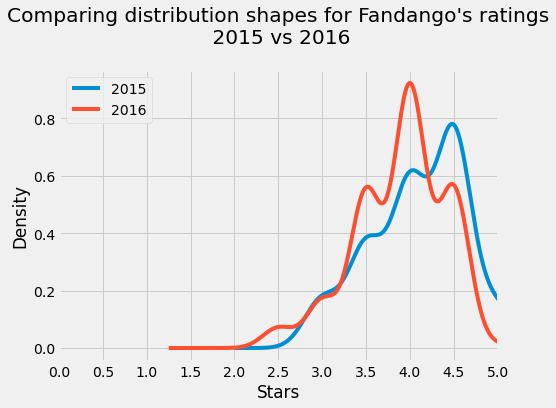

In [17]:
%matplotlib inline

# Generating two kernel density plots
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (7,5)) # adding a legend to explain that this distribution is for 2015
fandango_2016['fandango'].plot.kde(label = '2016', legend = True) # adding a legend to explain that this distribution is for 2016

plt.title("Comparing distribution shapes for Fandango's ratings\n 2015 vs 2016",
          y = 1.07) # adding a title to the graph
plt.xlabel('Stars') # adding a label to the x axis 
plt.xlim(0,5) # setting the limit of the x axis 
plt.xticks(arange(0,5.1,.5))
plt.show()

From the distribution above, we can make the following conclusions:

- Both distributions are left-skewed.

- The 2016 distribution shifts to the left comparing to 2015.

The slight left shift of the 2016 distribution shows that Fandango's movie ratings in 2016 are lower compared to Fandango's movie ratings in 2015. This might mean that there actually is a difference between these two sets of ratings.

## Comparing Relative Frequencies

It looks like we got some interesting results through the kernel density plot so far. Let's dig a little bit deeper into our data to discover more granular findings.

In [18]:
# Exploring the number of ratings that each data set has 
len(fandango_2015)

129

In [19]:
len(fandango_2016)

191

As shown above, the samples have different number of movies. So it using absolute frequencies to compare the two tables would not make sense. Let's use relative frequency instead and display the results in percentage for readability purposes.

In [20]:
# Examining the frequency distribution tables of the two distributions
freq_fandango_2015 = 100 * fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()
freq_fandango_2016 = 100 * fandango_2016['fandango'].value_counts(normalize=True).sort_index()

In [21]:
# Combining both tables into a dataframe for better comparison
combined_freq_tables = pd.concat([freq_fandango_2015, freq_fandango_2016], axis=1).fillna(0)
combined_freq_tables.rename(columns={"Fandango_Stars": "2015", "fandango": "2016"}, inplace=True)
combined_freq_tables.round(1) #rounding numbers to one decimal

,2015,2016
3.0,8.5,7.3
3.5,17.8,24.1
4.0,28.7,40.3
4.5,38.0,24.6
5.0,7.0,0.5
2.5,0.0,3.1


From the table above, we can conclude the following:

- The movies with the lowest rating in 2015 was 3.0, whereas it was 2.5 in 2016.

- The percentage of movies that received 3.5 star ratings is higher in 2016 than in 2015.

- Ratings of 4.0 were more popular in 2016, with approximately 12% more movies with a rating of 4.0 compared to 2015.

- Ratings of 4.5 were more popular in 2015, with approximately 13% more movies with a rating of 4.5 compared to 2016.

- There are lower percentages (less than 1%) in high ratings in movie ratings in 2016 compared to movie ratings in 2015.

These findings whos that there is a difference between the two distributions: for some ratings, the percentages went up in 2016 while for some it went down. However, the direction of this difference is not as clear as it was on the kernel density plot. 

## Determining the Direction of the Change

We'll take a couple of summary statistics to get a more precise picture about the direction. We'll take each distribution of movie ratings and compute its mean, median, and mode. Then, we'll compare these statistics to determine what they tell about the direction.

In [22]:
# Computing the means
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

# Computing the median
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

# Computing the modes
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

#Creating the dataframe of the computed statistics
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary.round(1)

,2015,2016
mean,4.1,3.9
median,4.0,4.0
mode,4.5,4.0


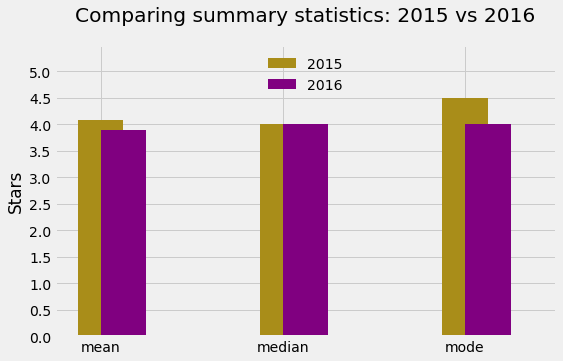

In [23]:
# Generating a grouped bar plot
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#a98d19', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'purple', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.06)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

As shown in the graph above, the mean of the Fandango's movie ratings in 2016 is lower than the mean of the Fandango's movie ratings in 2015 by approximately 0.2. This shows a drop of almost 5% relative of the mean ratings in 2016 to the mean ratings in 2015. Moreover, there's no significant difference between the median for movie ratings in 2015 and the median for movie ratings in 2016. Also, the most frequent star rating in 2016 was 4.0, which is lower compared to the most popular rating of 2015, that is, 4.5. This confirms that on average, fans who rated movies in 2016 were more likely to rate them lower compared to those who rated the movies in 2015.  

# Conclusion

The purpose of this project was to test the reliability of Fandango's rating system. In October 2015, a data journalist named Walt Hickey analysed a dataset and he found some strong evidence that proved Fandango's dishonesty and biases. After Hickey published his article, Fandango's officials have presumably fixed the error, but we cannot tell for sure. 

After overcoming the unexpected setback of having an unrepresentative samples, we carried on by changing the goal of our analysis. More specifically, we created two, more representative data sets: one with Fandango's movie ratings published in 2015 (before Hickey's article), and one with Fandango's movie ratings published in 2016 (after Hickey's article). We then plotted and compared the two distributions and their relative frequencies to get to our final results.

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015. It is believed that this change was caused by Fandango's representatives fixing the biased rating system following Hickey's analysis. However, we have no tangible proof of this hypothesis since the rating values are not displayed anymore in Fandango's pages' HTML.